In [20]:
import pandas as pd 
df = pd.read_csv('Speed Dating Data.csv', encoding='latin1')

In [21]:
df

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


# 目的変数 dec の欠損値を確認

In [22]:
df['dec_o'].isnull().sum()

np.int64(0)

## 年齢差カラムを追加

In [23]:
# 年齢差（相手の年齢 - 自分の年齢）のカラムを追加
df['age_diff'] = df['age_o'] - df['age']
df[['age_o', 'age', 'age_diff']].head()

,age_o,age,age_diff
0,27.0,21.0,6.0
1,22.0,21.0,1.0
2,22.0,21.0,1.0
3,23.0,21.0,2.0
4,24.0,21.0,3.0


## ラベルを保持するカラムをワンホットエンコードする。

### 人種をワンホット化

In [24]:
# race, race_o のワンホットエンコーディングカラムを追加
race_labels = {
    1: 'black',
    2: 'white',
    3: 'latino',
    4: 'asian',
    5: 'native',
    6: 'other'
}

for code, label in race_labels.items():
    df[f'race_{label}'] = (df['race'] == code).astype(int)
    df[f'race_{label}_o'] = (df['race_o'] == code).astype(int)

# 追加したカラムの先頭5行を表示
df[[f'race_{label}' for label in race_labels.values()] + 
   [f'race_{label}_o' for label in race_labels.values()]].head()

,race_black,race_white,race_latino,race_asian,race_native,race_other,race_black_o,race_white_o,race_latino_o,race_asian_o,race_native_o,race_other_o
0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,0,0


### 専攻をワンホット化

In [45]:
# field_cd のワンホットエンコーディングカラムを追加
field_labels = {
    1: 'law',
    2: 'math',
    3: 'social_science',
    4: 'medical_science',
    5: 'engineering',
    6: 'english',
    7: 'history',
    8: 'business',
    9: 'education',
    10: 'science',
    11: 'social_work',
    12: 'undergrad',
    13: 'politics',
    14: 'film',
    15: 'fine_arts',
    16: 'languages',
    17: 'architecture',
    18: 'other'
}

for code, label in field_labels.items():
    df[f'field_{label}'] = (df['field_cd'] == code).astype(int)

# 追加したカラムの先頭5行を表示
df[[f'field_{label}' for label in field_labels.values()]].head()

,field_law,field_math,field_social_science,field_medical_science,field_engineering,field_english,field_history,field_business,field_education,field_science,field_social_work,field_undergrad,field_politics,field_film,field_fine_arts,field_languages,field_architecture,field_other
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 将来の職業をワンホット化

In [53]:
# career_c のワンホットエンコーディングカラムを追加
career_labels = {
    1: 'lawyer',
    2: 'academic_research',
    3: 'psychologist',
    4: 'doctor_medicine',
    5: 'engineer',
    6: 'creative_arts_entertainment',
    7: 'business_related',
    8: 'real_estate',
    9: 'international_humanitarian',
    10: 'undecided',
    11: 'social_work',
    12: 'speech_pathology',
    13: 'politics',
    14: 'pro_sports_athletics',
    15: 'other',
    16: 'journalism',
    17: 'architecture'
}

for code, label in career_labels.items():
    df[f'career_{label}'] = (df['career_c'] == code).astype(int)

# 追加したカラムの先頭5行を表示
df[[f'career_{label}' for label in career_labels.values()]].head()

,career_lawyer,career_academic_research,career_psychologist,career_doctor_medicine,career_engineer,career_creative_arts_entertainment,career_business_related,career_real_estate,career_international_humanitarian,career_undecided,career_social_work,career_speech_pathology,career_politics,career_pro_sports_athletics,career_other,career_journalism,career_architecture
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 利用するカラムを選定<br>

In [59]:
# データの基本情報確認
print("データの形状:", df.shape)
print("\n目的変数 'dec_o' の値の分布:")
# どう言う人が相手から会いたいとおもわれるのか
print(df['dec_o'].value_counts())
print(f"\n目的変数の欠損値数: {df['dec_o'].isnull().sum()}")

# Speed Dating データで重要そうな特徴量を選定
# 個人の基本情報と最初の印象評価を使用
feature_columns = [
    'age',           # 年齢
    'age_diff',     # 年齢差（相手の年齢 - 自分の年齢）
    # こう言う価値観を大事にしている人がモテる
    'attr1_1',       # 魅力の重視度
    'sinc1_1',       # 誠実さの重視度  
    'intel1_1',      # 知性の重視度
    'fun1_1',        # 楽しさの重視度
    'amb1_1',        # 野心の重視度
    'shar1_1',       # 共通の興味の重視度
    # 相手に対して、こう思った人がモテる
    'attr',          # 相手への魅力評価　
    'sinc',          # 相手への誠実さ評価
    'intel',         # 相手への知性評価
    'fun',           # 相手への楽しさ評価
    'amb',           # 相手への野心評価
    'shar',           # 相手との共通の興味評価
    'samerace', # 同じ人種かどうか（1: 同じ人種, 0: 異なる人種）
    # 人種ワンホット
    'race_black', 'race_white', 'race_latino', 'race_asian', 'race_native', 'race_other',
    # 専攻ワンホット
    'field_law', 'field_math', 'field_social_science', 'field_medical_science', 'field_engineering',
    'field_english', 'field_history', 'field_business', 'field_education', 'field_science',
    'field_social_work', 'field_undergrad', 'field_politics', 'field_film', 'field_fine_arts',
    'field_languages', 'field_architecture', 'field_other',
    # 将来の職業ワンホット
    'career_lawyer', 'career_academic_research', 'career_psychologist', 'career_doctor_medicine',
    'career_engineer', 'career_creative_arts_entertainment', 'career_business_related',
    'career_real_estate', 'career_international_humanitarian', 'career_undecided',
    'career_social_work', 'career_speech_pathology', 'career_politics',
    'career_pro_sports_athletics', 'career_other', 'career_journalism', 'career_architecture',
    # 会ったことがあるか
    'met', 'met_o',
    # 相手が自分にどう言う印象を持つ時、会いたいと思うか
    # 'attr_o',       # 魅力の重視度 相手の魅力とかいう雑な評価は当てにならない
    'sinc_o',       # 誠実さ
    'intel_o',      # 知性
    'fun_o',        # 楽しさ
    'amb_o',        # 野心
    'shar_o',       # 共通の興味
    'date', # デートに行く頻度
    # 趣味・余暇活動
    'sports',      # スポーツをすること/運動競技
    'tvsports',    # スポーツ観戦
    'exercise',    # エクササイズ/ボディビル
    'dining',      # 外食
    'museums',     # 美術館/博物館
    'art',         # アート鑑賞
    'hiking',      # ハイキング/キャンプ
    'gaming',      # ゲーム
    'clubbing',    # クラブ/ダンス
    'reading',     # 読書
    'tv',          # テレビ鑑賞
    'theater',     # 演劇鑑賞
    'movies',      # 映画鑑賞
    'concerts',    # コンサートに行くこと
    'music',       # 音楽鑑賞
    'shopping',    # ショッピング
    'yoga',        # ヨガ/瞑想
    # 自己評価
    'attr3_1',       # 魅力
    'sinc3_1',       # 誠実さ  
    'intel3_1',      # 知性
    'fun3_1',        # 楽しさ
    'amb3_1',        # 野心
]

print(f"\n選定した特徴量数: {len(feature_columns)}")
print("特徴量リスト:", feature_columns)

データの形状: (8378, 243)

目的変数 'dec_o' の値の分布:
dec_o
0    4863
1    3515
Name: count, dtype: int64

目的変数の欠損値数: 0

選定した特徴量数: 86
特徴量リスト: ['age', 'age_diff', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'samerace', 'race_black', 'race_white', 'race_latino', 'race_asian', 'race_native', 'race_other', 'field_law', 'field_math', 'field_social_science', 'field_medical_science', 'field_engineering', 'field_english', 'field_history', 'field_business', 'field_education', 'field_science', 'field_social_work', 'field_undergrad', 'field_politics', 'field_film', 'field_fine_arts', 'field_languages', 'field_architecture', 'field_other', 'career_lawyer', 'career_academic_research', 'career_psychologist', 'career_doctor_medicine', 'career_engineer', 'career_creative_arts_entertainment', 'career_business_related', 'career_real_estate', 'career_international_humanitarian', 'career_undecided', 'career_social_work', 'career_speech_pathology', 'ca

In [60]:
# 選定した特徴量の欠損値を確認
print("=== 各特徴量の欠損値数 ===")
for col in feature_columns:
    if col in df.columns:
        missing_count = df[col].isnull().sum()
        missing_pct = (missing_count / len(df)) * 100
        print(f"{col:12s}: {missing_count:5d} ({missing_pct:5.1f}%)")
    else:
        print(f"{col:12s}: カラムが存在しません")

# 欠損値の多い特徴量を除外または対応を検討
print(f"\n総データ数: {len(df)}")

=== 各特徴量の欠損値数 ===
age         :    95 (  1.1%)
age_diff    :   198 (  2.4%)
attr1_1     :    79 (  0.9%)
sinc1_1     :    79 (  0.9%)
intel1_1    :    79 (  0.9%)
fun1_1      :    89 (  1.1%)
amb1_1      :    99 (  1.2%)
shar1_1     :   121 (  1.4%)
attr        :   202 (  2.4%)
sinc        :   277 (  3.3%)
intel       :   296 (  3.5%)
fun         :   350 (  4.2%)
amb         :   712 (  8.5%)
shar        :  1067 ( 12.7%)
samerace    :     0 (  0.0%)
race_black  :     0 (  0.0%)
race_white  :     0 (  0.0%)
race_latino :     0 (  0.0%)
race_asian  :     0 (  0.0%)
race_native :     0 (  0.0%)
race_other  :     0 (  0.0%)
field_law   :     0 (  0.0%)
field_math  :     0 (  0.0%)
field_social_science:     0 (  0.0%)
field_medical_science:     0 (  0.0%)
field_engineering:     0 (  0.0%)
field_english:     0 (  0.0%)
field_history:     0 (  0.0%)
field_business:     0 (  0.0%)
field_education:     0 (  0.0%)
field_science:     0 (  0.0%)
field_social_work:     0 (  0.0%)
field_undergrad:   

In [ ]:
# scikit-learnのライブラリをインポート
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# 目的変数と特徴量の準備
# 目的変数(dec_o)に欠損値がある行を除外
df_clean = df.dropna(subset=['dec_o'])
print(f"欠損値除外後のデータ数: {len(df_clean)} (元: {len(df)})")

# 目的変数を準備
y = df_clean['dec_o'].astype(int)  # 0 or 1に変換
print(f"\n目的変数の分布:")
print(y.value_counts())
print(f"クラス比率 - No(0): {(y==0).mean():.3f}, Yes(1): {(y==1).mean():.3f}")

欠損値除外後のデータ数: 8378 (元: 8378)

目的変数の分布:
dec_o
0    4863
1    3515
Name: count, dtype: int64
クラス比率 - No(0): 0.580, Yes(1): 0.420


In [ ]:
# 特徴量行列の準備
# 存在する特徴量のみを使用
available_features = [col for col in feature_columns if col in df_clean.columns]
print(f"利用可能な特徴量: {len(available_features)}")
print(f"利用可能な特徴量リスト: {available_features}")

# 特徴量行列X を作成
X = df_clean[available_features]
print(f"\n特徴量行列の形状: {X.shape}")

# 各特徴量の欠損値を最終確認
print(f"\n=== 最終的な欠損値状況 ===")
missing_summary = X.isnull().sum()
print(missing_summary[missing_summary > 0])

# scikit-learn 1.6.1は欠損値を自動処理するため、そのまま使用可能
print(f"\n欠損値のある行数: {X.isnull().any(axis=1).sum()}")

利用可能な特徴量: 86
利用可能な特徴量リスト: ['age', 'age_diff', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'samerace', 'race_black', 'race_white', 'race_latino', 'race_asian', 'race_native', 'race_other', 'field_law', 'field_math', 'field_social_science', 'field_medical_science', 'field_engineering', 'field_english', 'field_history', 'field_business', 'field_education', 'field_science', 'field_social_work', 'field_undergrad', 'field_politics', 'field_film', 'field_fine_arts', 'field_languages', 'field_architecture', 'field_other', 'career_lawyer', 'career_academic_research', 'career_psychologist', 'career_doctor_medicine', 'career_engineer', 'career_creative_arts_entertainment', 'career_business_related', 'career_real_estate', 'career_international_humanitarian', 'career_undecided', 'career_social_work', 'career_speech_pathology', 'career_politics', 'career_pro_sports_athletics', 'career_other', 'career_journalism', 'career_architectur

In [89]:
# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.1,      # 20%をテストデータに
    random_state=42,    # 再現性のため
    stratify=y          # クラス比率を保持
)

print("=== データ分割結果 ===")
print(f"訓練データ: {X_train.shape[0]} サンプル")
print(f"テストデータ: {X_test.shape[0]} サンプル")
print(f"特徴量数: {X_train.shape[1]}")

# 訓練データとテストデータのクラス分布を確認
print(f"\n訓練データのクラス分布:")
print(f"  No(0): {(y_train==0).sum()} ({(y_train==0).mean():.3f})")
print(f"  Yes(1): {(y_train==1).sum()} ({(y_train==1).mean():.3f})")

print(f"\nテストデータのクラス分布:")
print(f"  No(0): {(y_test==0).sum()} ({(y_test==0).mean():.3f})")
print(f"  Yes(1): {(y_test==1).sum()} ({(y_test==1).mean():.3f})")

=== データ分割結果 ===
訓練データ: 7540 サンプル
テストデータ: 838 サンプル
特徴量数: 86

訓練データのクラス分布:
  No(0): 4377 (0.581)
  Yes(1): 3163 (0.419)

テストデータのクラス分布:
  No(0): 486 (0.580)
  Yes(1): 352 (0.420)


In [93]:
# 決定木分類器を作成
clf = DecisionTreeClassifier(
    random_state=42,          # 再現性のため
    max_depth=10,             # 過学習を防ぐため深さを制限
    min_samples_split=20,     # 分割に必要な最小サンプル数
    min_samples_leaf=10,      # 葉ノードの最小サンプル数
    class_weight='balanced'   # クラス不均衡を考慮
)

print("=== 決定木モデルの訓練 ===")
print("モデルパラメータ:")
print(f"  最大深さ: {clf.max_depth}")
print(f"  分割最小サンプル数: {clf.min_samples_split}")
print(f"  葉ノード最小サンプル数: {clf.min_samples_leaf}")
print(f"  クラス重み: {clf.class_weight}")

# モデルを訓練
clf.fit(X_train, y_train)

=== 決定木モデルの訓練 ===
モデルパラメータ:
  最大深さ: 10
  分割最小サンプル数: 20
  葉ノード最小サンプル数: 10
  クラス重み: balanced


DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=10, min_samples_split=20,
                       random_state=42)

In [94]:
# モデルの予測と評価
print("=== モデルの評価 ===")

# 訓練データでの予測
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# テストデータでの予測
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"訓練データの精度: {train_accuracy:.4f}")
print(f"テストデータの精度: {test_accuracy:.4f}")

# 過学習チェック
if train_accuracy - test_accuracy > 0.1:
    print("⚠️  過学習の可能性があります")
else:
    print("✅ 過学習は見られません")

print(f"\n=== 詳細な分類レポート（テストデータ） ===")
print(classification_report(y_test, y_test_pred, 
                          target_names=['No Decision', 'Yes Decision']))

=== モデルの評価 ===
訓練データの精度: 0.7898
テストデータの精度: 0.6563
⚠️  過学習の可能性があります

=== 詳細な分類レポート（テストデータ） ===
              precision    recall  f1-score   support

 No Decision       0.73      0.65      0.69       486
Yes Decision       0.58      0.66      0.62       352

    accuracy                           0.66       838
   macro avg       0.65      0.66      0.65       838
weighted avg       0.67      0.66      0.66       838



In [95]:
# 混同行列の表示
print("=== 混同行列（テストデータ） ===")
cm = confusion_matrix(y_test, y_test_pred)
print("              予測")
print("        No    Yes")
print(f"実際 No  {cm[0,0]:3d}   {cm[0,1]:3d}")
print(f"    Yes  {cm[1,0]:3d}   {cm[1,1]:3d}")

# 特徴量重要度の分析
print(f"\n=== 特徴量重要度 ===")
feature_importance = pd.DataFrame({
    '特徴量': available_features,
    '重要度': clf.feature_importances_
}).sort_values('重要度', ascending=False)

print("上位10個の重要な特徴量:")
for i, (_, row) in enumerate(feature_importance.head(10).iterrows(), 1):
    print(f"{i:2d}. {row['特徴量']:12s}: {row['重要度']:.4f}")

# 決定木の基本情報
print(f"\n=== 決定木の構造情報 ===")
print(f"木の深さ: {clf.get_depth()}")
print(f"葉ノード数: {clf.get_n_leaves()}")
print(f"使用された特徴量数: {sum(clf.feature_importances_ > 0)}")

=== 混同行列（テストデータ） ===
              予測
        No    Yes
実際 No  317   169
    Yes  119   233

=== 特徴量重要度 ===
上位10個の重要な特徴量:
 1. fun_o       : 0.3719
 2. shar_o      : 0.1416
 3. shar1_1     : 0.0341
 4. attr        : 0.0326
 5. age_diff    : 0.0302
 6. amb1_1      : 0.0177
 7. intel1_1    : 0.0164
 8. sinc_o      : 0.0161
 9. clubbing    : 0.0153
10. intel       : 0.0150

=== 決定木の構造情報 ===
木の深さ: 10
葉ノード数: 280
使用された特徴量数: 56


/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/2477590247.py:16: UserWarning:

Glyph 27770 (\N{CJK UNIFIED IDEOGRAPH-6C7A}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/2477590247.py:16: UserWarning:

Glyph 23450 (\N{CJK UNIFIED IDEOGRAPH-5B9A}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/2477590247.py:16: UserWarning:

Glyph 26408 (\N{CJK UNIFIED IDEOGRAPH-6728}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/2477590247.py:16: UserWarning:

Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/2477590247.py:16: UserWarning:

Glyph 27083 (\N{CJK UNIFIED IDEOGRAPH-69CB}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/2477590247.py:16: UserWarning:

Glyph 36896 (\N{CJK UNIFIED IDEOGRAPH-9020}) missing from font

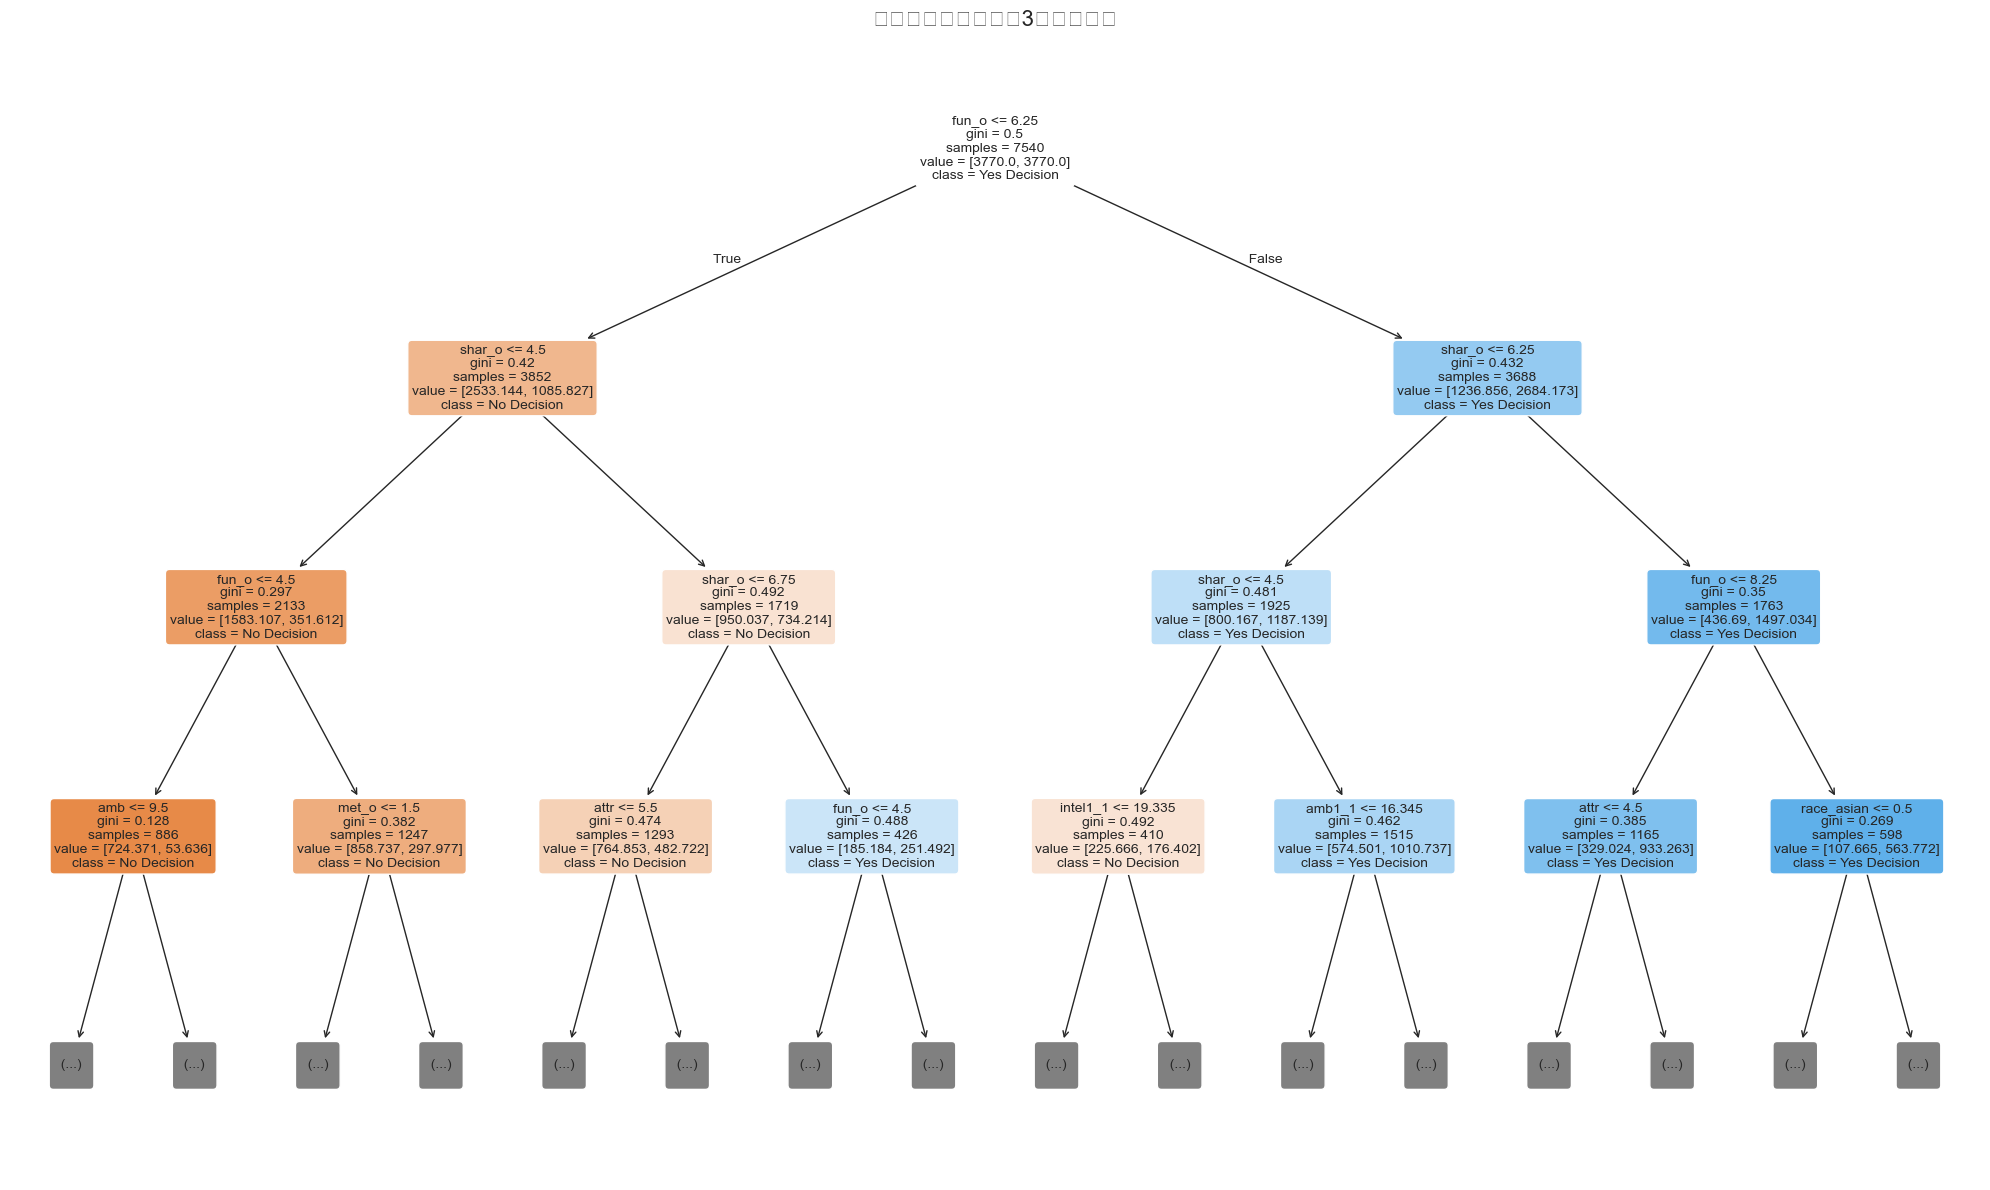

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/2477590247.py:27: UserWarning:

Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/2477590247.py:27: UserWarning:

Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/2477590247.py:27: UserWarning:

Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/2477590247.py:27: UserWarning:

Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/2477590247.py:27: UserWarning:

Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/2477590247.py:27: UserWarning:

Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing f

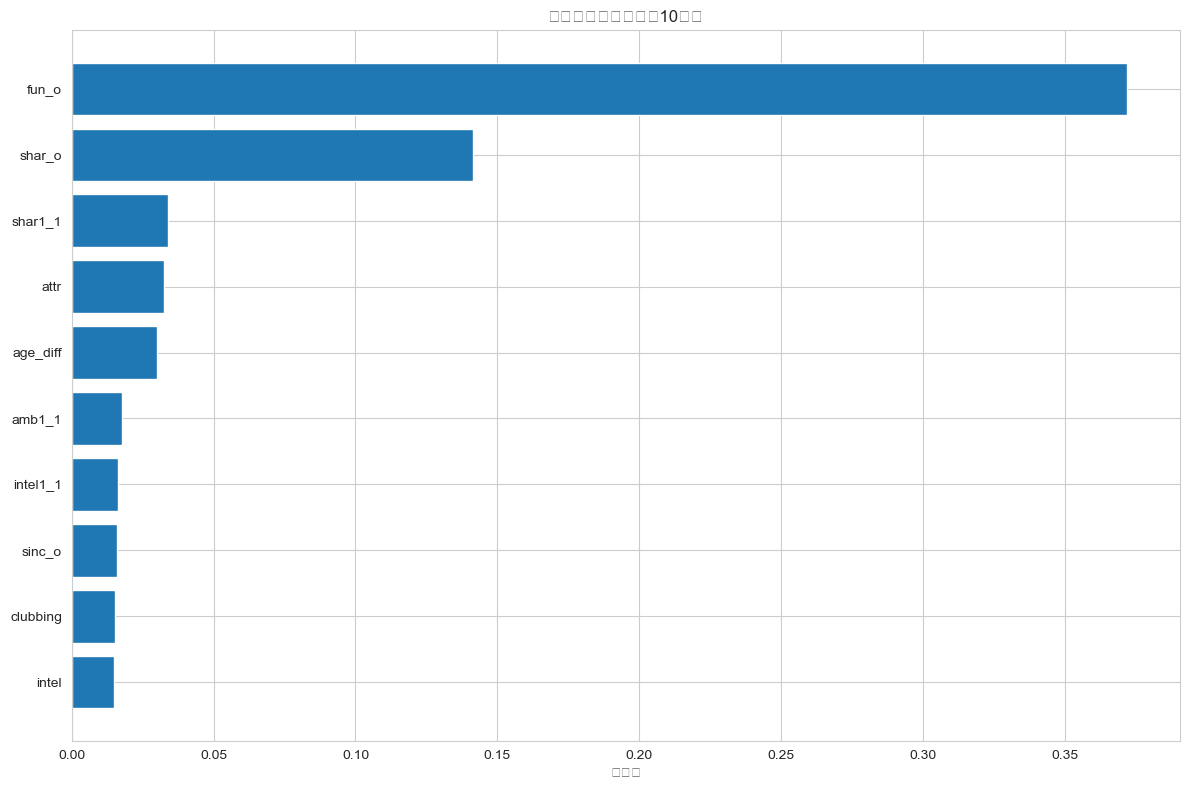

In [96]:
# 決定木の可視化
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 決定木を可視化（深さを制限して見やすくする）
plt.figure(figsize=(20, 12))
plot_tree(clf, 
          max_depth=3,  # 表示する深さを制限
          feature_names=available_features,
          class_names=['No Decision', 'Yes Decision'],
          filled=True,
          rounded=True,
          fontsize=10)

plt.title('決定木の構造（深さ3まで表示）', fontsize=16)
plt.tight_layout()
plt.show()

# 重要度の可視化
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['重要度'])
plt.yticks(range(len(top_features)), top_features['特徴量'])
plt.xlabel('重要度')
plt.title('特徴量重要度（上位10個）')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [97]:
# 実際の予測例
print("=== 実際の予測例 ===")

# テストデータから数例を選んで予測過程を確認
sample_indices = [0, 1, 2, 3, 4]
sample_data = X_test.iloc[sample_indices]
sample_true = y_test.iloc[sample_indices]
sample_pred = clf.predict(sample_data)
sample_proba = clf.predict_proba(sample_data)

for i, idx in enumerate(sample_indices):
    print(f"\n--- サンプル {i+1} ---")
    print(f"実際の結果: {'Yes' if sample_true.iloc[i] == 1 else 'No'}")
    print(f"予測結果: {'Yes' if sample_pred[i] == 1 else 'No'}")
    print(f"予測確率: No={sample_proba[i][0]:.3f}, Yes={sample_proba[i][1]:.3f}")
    
    # 重要な特徴量の値を表示
    print("主要な特徴量の値:")
    for feature in feature_importance.head(5)['特徴量']:
        if not pd.isna(sample_data.iloc[i][feature]):
            print(f"  {feature}: {sample_data.iloc[i][feature]:.2f}")
        else:
            print(f"  {feature}: 欠損値（自動処理済み）")

# モデルの解釈と考察
print("\n" + "="*50)
print("=== モデルの解釈と考察 ===")
print("このSpeed Dating決定木モデルから分かること:")
print("1. 最も重要な特徴量が何であるかを確認")
print("2. 各特徴量がYes/No決定にどう影響するか")
print("3. 決定木の分岐ルールから意思決定パターンを理解")
print("4. 予測精度から実用性を評価")

=== 実際の予測例 ===

--- サンプル 1 ---
実際の結果: Yes
予測結果: Yes
予測確率: No=0.098, Yes=0.902
主要な特徴量の値:
  fun_o: 8.00
  shar_o: 7.00
  shar1_1: 0.00
  attr: 5.00
  age_diff: 6.00

--- サンプル 2 ---
実際の結果: No
予測結果: Yes
予測確率: No=0.282, Yes=0.718
主要な特徴量の値:
  fun_o: 7.00
  shar_o: 8.00
  shar1_1: 14.29
  attr: 9.00
  age_diff: 1.00

--- サンプル 3 ---
実際の結果: No
予測結果: No
予測確率: No=0.890, Yes=0.110
主要な特徴量の値:
  fun_o: 5.00
  shar_o: 欠損値（自動処理済み）
  shar1_1: 10.87
  attr: 9.00
  age_diff: -1.00

--- サンプル 4 ---
実際の結果: No
予測結果: No
予測確率: No=0.628, Yes=0.372
主要な特徴量の値:
  fun_o: 5.00
  shar_o: 5.00
  shar1_1: 14.55
  attr: 7.00
  age_diff: -2.00

--- サンプル 5 ---
実際の結果: Yes
予測結果: Yes
予測確率: No=0.113, Yes=0.887
主要な特徴量の値:
  fun_o: 7.00
  shar_o: 5.00
  shar1_1: 欠損値（自動処理済み）
  attr: 5.00
  age_diff: 欠損値（自動処理済み）

=== モデルの解釈と考察 ===
このSpeed Dating決定木モデルから分かること:
1. 最も重要な特徴量が何であるかを確認
2. 各特徴量がYes/No決定にどう影響するか
3. 決定木の分岐ルールから意思決定パターンを理解
4. 予測精度から実用性を評価


=== 改良された決定木可視化 ===


/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/648903200.py:29: UserWarning:

Glyph 27770 (\N{CJK UNIFIED IDEOGRAPH-6C7A}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/648903200.py:29: UserWarning:

Glyph 23450 (\N{CJK UNIFIED IDEOGRAPH-5B9A}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/648903200.py:29: UserWarning:

Glyph 26408 (\N{CJK UNIFIED IDEOGRAPH-6728}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/648903200.py:29: UserWarning:

Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/648903200.py:29: UserWarning:

Glyph 28145 (\N{CJK UNIFIED IDEOGRAPH-6DF1}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/648903200.py:29: UserWarning:

Glyph 12373 (\N{HIRAGANA LETTER SA}) missing from font(s) Ar

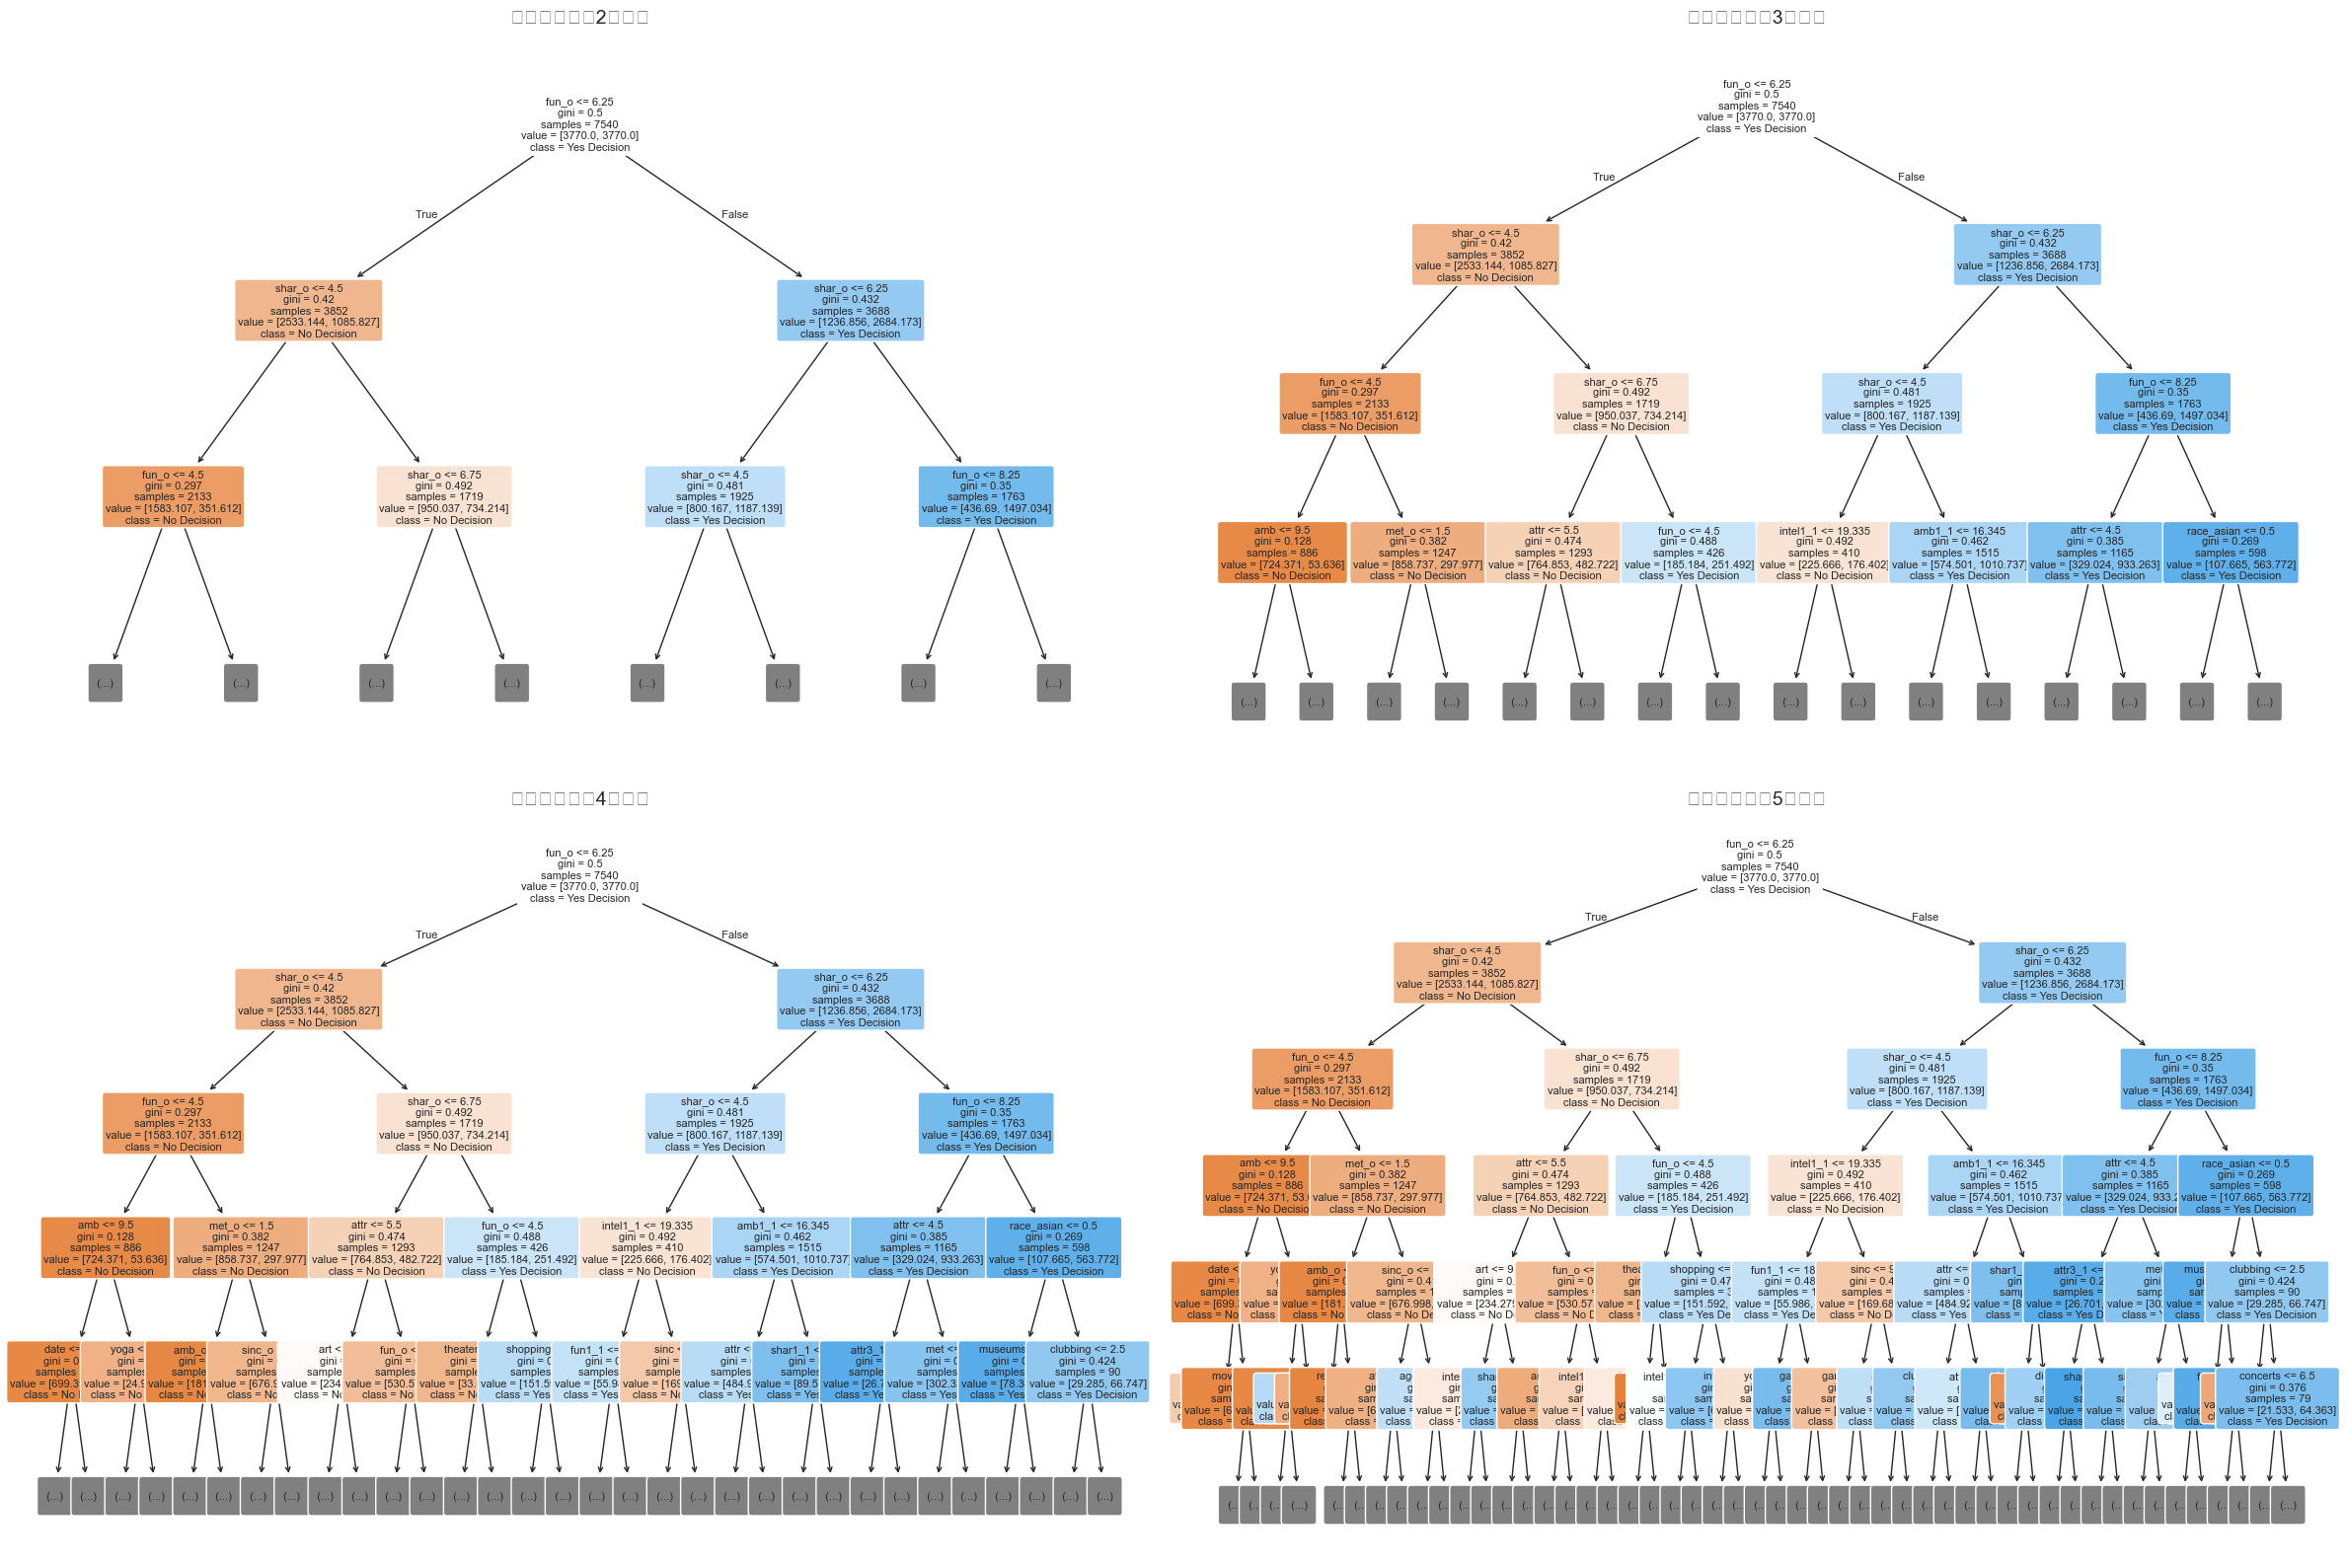

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/648903200.py:46: UserWarning:

Glyph 27770 (\N{CJK UNIFIED IDEOGRAPH-6C7A}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/648903200.py:46: UserWarning:

Glyph 23450 (\N{CJK UNIFIED IDEOGRAPH-5B9A}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/648903200.py:46: UserWarning:

Glyph 26408 (\N{CJK UNIFIED IDEOGRAPH-6728}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/648903200.py:46: UserWarning:

Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/648903200.py:46: UserWarning:

Glyph 27083 (\N{CJK UNIFIED IDEOGRAPH-69CB}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/648903200.py:46: UserWarning:

Glyph 36896 (\N{CJK UNIFIED IDEOGRAPH-9020}) missing from font(s) Ar

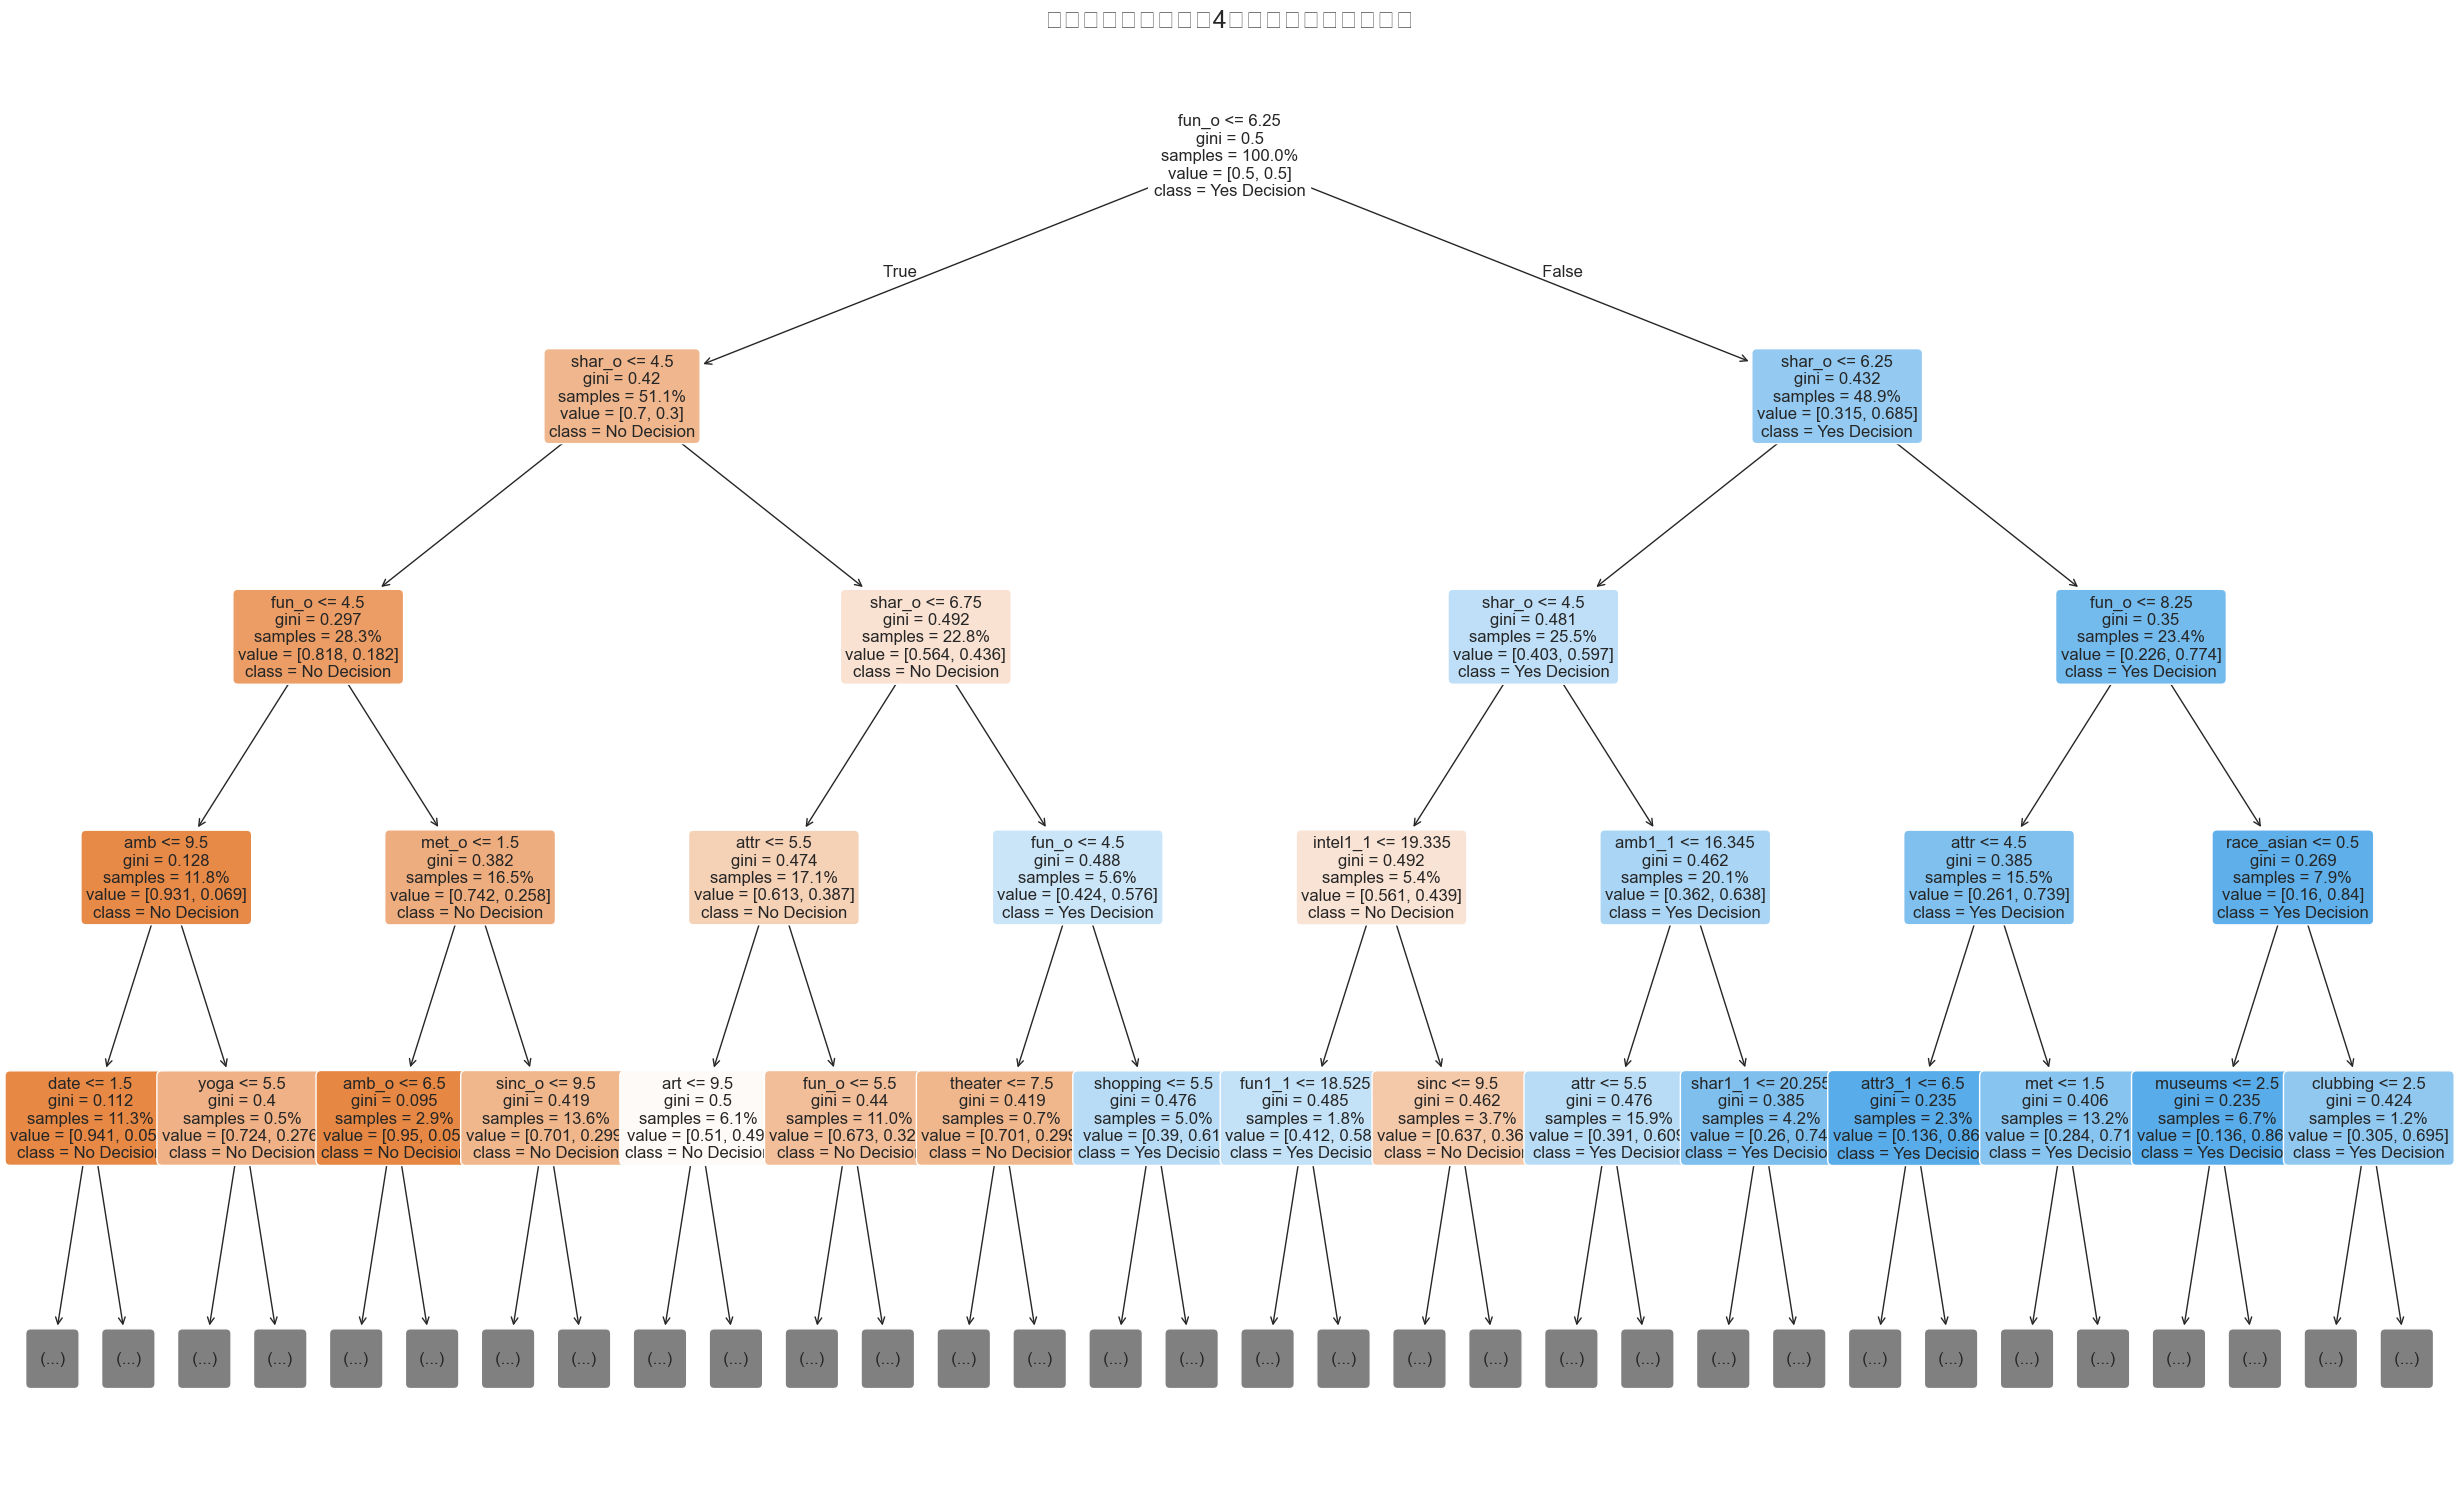

In [98]:
# 改良された決定木可視化
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_text, plot_tree

# Seabornのスタイル設定
sns.set_style("whitegrid")

print("=== 改良された決定木可視化 ===")

# 方法1: 階層別に分けて表示
def plot_tree_levels(clf, feature_names, max_depth=5):
    """決定木を階層別に分けて表示"""
    fig, axes = plt.subplots(2, 2, figsize=(24, 16))
    axes = axes.ravel()
    
    for i, depth in enumerate([2, 3, 4, 5]):
        if i < 4:
            plot_tree(clf, 
                     max_depth=depth,
                     feature_names=feature_names,
                     class_names=['No Decision', 'Yes Decision'],
                     filled=True,
                     rounded=True,
                     fontsize=8,
                     ax=axes[i])
            axes[i].set_title(f'決定木（深さ{depth}まで）', fontsize=14)
    
    plt.tight_layout()
    plt.show()

# 階層別表示を実行
plot_tree_levels(clf, available_features)

# 方法2: 重要な分岐のみを大きく表示
plt.figure(figsize=(25, 15))
plot_tree(clf, 
          max_depth=4,
          feature_names=available_features,
          class_names=['No Decision', 'Yes Decision'],
          filled=True,
          rounded=True,
          fontsize=12,
          proportion=True)  # ノードサイズをサンプル数に比例
plt.title('決定木の構造（深さ4・ノードサイズ比例）', fontsize=18)
plt.tight_layout()
plt.show()

In [99]:
from sklearn.tree import export_text

# 方法3: テキスト形式の決定木（詳細版）
print("=== テキスト形式の決定木 ===")
tree_rules = export_text(clf, 
                        feature_names=available_features,
                        max_depth=5)
print(tree_rules[:2000])  # 最初の2000文字を表示
print("...(以下省略)")

# 方法4: 重要な分岐パスのみを抽出して表示
def extract_important_paths(clf, feature_names, max_paths=10):
    """重要な分岐パスを抽出"""
    from sklearn.tree import _tree
    
    tree = clf.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree.feature
    ]
    
    paths = []
    
    def recurse(node, path, depth):
        if depth > 5:  # 深さ制限
            return
            
        if tree.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree.threshold[node]
            
            # 左の子（条件を満たす）
            left_path = path + [f"{name} <= {threshold:.3f}"]
            recurse(tree.children_left[node], left_path, depth + 1)
            
            # 右の子（条件を満たさない）
            right_path = path + [f"{name} > {threshold:.3f}"]
            recurse(tree.children_right[node], right_path, depth + 1)
        else:
            # 葉ノード
            samples = tree.n_node_samples[node]
            value = tree.value[node][0]
            majority_class = "Yes Decision" if value[1] > value[0] else "No Decision"
            confidence = max(value) / sum(value)
            
            paths.append({
                'path': path,
                'samples': samples,
                'class': majority_class,
                'confidence': confidence
            })
    
    recurse(0, [], 0)
    
    # サンプル数の多い順にソート
    paths.sort(key=lambda x: x['samples'], reverse=True)
    
    print(f"\n=== 重要な分岐パス（上位{min(max_paths, len(paths))}個） ===")
    for i, path_info in enumerate(paths[:max_paths], 1):
        print(f"\nパス {i}: {path_info['class']} (信頼度: {path_info['confidence']:.3f}, サンプル数: {path_info['samples']})")
        for step in path_info['path']:
            print(f"  → {step}")

extract_important_paths(clf, available_features)

=== テキスト形式の決定木 ===
|--- fun_o <= 6.25
|   |--- shar_o <= 4.50
|   |   |--- fun_o <= 4.50
|   |   |   |--- amb <= 9.50
|   |   |   |   |--- date <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- date >  1.50
|   |   |   |   |   |--- movies <= 3.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- movies >  3.50
|   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |--- amb >  9.50
|   |   |   |   |--- yoga <= 5.50
|   |   |   |   |   |--- shar_o <= 2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- shar_o >  2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- yoga >  5.50
|   |   |   |   |   |--- class: 1
|   |   |--- fun_o >  4.50
|   |   |   |--- met_o <= 1.50
|   |   |   |   |--- amb_o <= 6.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- amb_o >  6.50
|   |   |   |   |   |--- reading <= 2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- reading >  2.50
|   |   |   |   |   |   |--- truncat

In [129]:
# 方法5: Plotlyを使ったインタラクティブな可視化
%pip install -q nbformat

try:
    import plotly.graph_objects as go
    import plotly.express as px
    from plotly.subplots import make_subplots

    def create_interactive_tree_summary(clf, feature_names, feature_importance_df):
        """インタラクティブな決定木要約を作成"""

        # 1. 特徴量重要度のインタラクティブなバーチャート
        fig_importance = px.bar(
            feature_importance_df.head(15),
            x='重要度',
            y='特徴量',
            orientation='h',
            title='特徴量重要度（インタラクティブ）',
            color='重要度',
            color_continuous_scale='viridis'
        )
        fig_importance.update_layout(height=600, yaxis={'categoryorder':'total ascending'})
        fig_importance.show()

        # 2. 決定木の深さ別の性能比較
        depths = range(1, 11)
        train_scores = []
        test_scores = []

        for depth in depths:
            temp_clf = DecisionTreeClassifier(
                max_depth=depth,
                random_state=42,
                class_weight='balanced'
            )
            temp_clf.fit(X_train, y_train)
            train_scores.append(temp_clf.score(X_train, y_train))
            test_scores.append(temp_clf.score(X_test, y_test))

        fig_performance = go.Figure()
        fig_performance.add_trace(go.Scatter(
            x=list(depths),
            y=train_scores,
            mode='lines+markers',
            name='訓練データ精度',
            line=dict(color='blue')
        ))
        fig_performance.add_trace(go.Scatter(
            x=list(depths),
            y=test_scores,
            mode='lines+markers',
            name='テストデータ精度',
            line=dict(color='red')
        ))

        fig_performance.update_layout(
            title='決定木の深さと予測精度の関係',
            xaxis_title='最大深さ',
            yaxis_title='精度',
            height=500
        )
        fig_performance.show()

        print(f"✅ インタラクティブな可視化を作成しました")
        print(f"最適な深さ: {depths[test_scores.index(max(test_scores))]}")

    create_interactive_tree_summary(clf, available_features, feature_importance)

except ImportError:
    print("⚠️ Plotlyがインストールされていません")
    print("インストール: pip install plotly")
    print("代替として静的なグラフを使用します")

Note: you may need to restart the kernel to use updated packages.


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

=== Seabornを活用した決定木分析 ===


/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/3442646144.py:16: UserWarning:

Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/3442646144.py:16: UserWarning:

Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/3442646144.py:16: UserWarning:

Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/3442646144.py:16: UserWarning:

Glyph 12505 (\N{KATAKANA LETTER BE}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/3442646144.py:16: UserWarning:

Glyph 12523 (\N{KATAKANA LETTER RU}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/3442646144.py:16: UserWarning:

Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from font(s) Arial.

/var

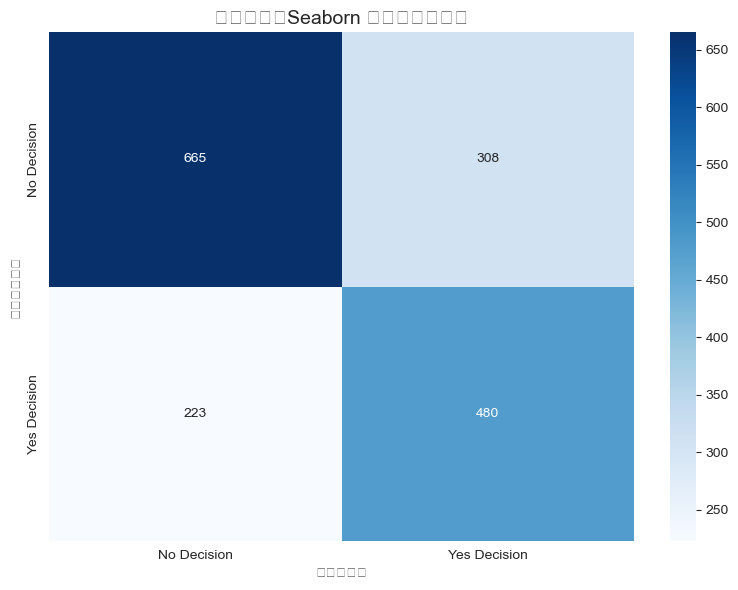

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/3442646144.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/3442646144.py:31: UserWarning:

Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/3442646144.py:31: UserWarning:

Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/3442646144.py:31: UserWarning:

Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/3442646144.py:31: UserWarning:

Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipyk

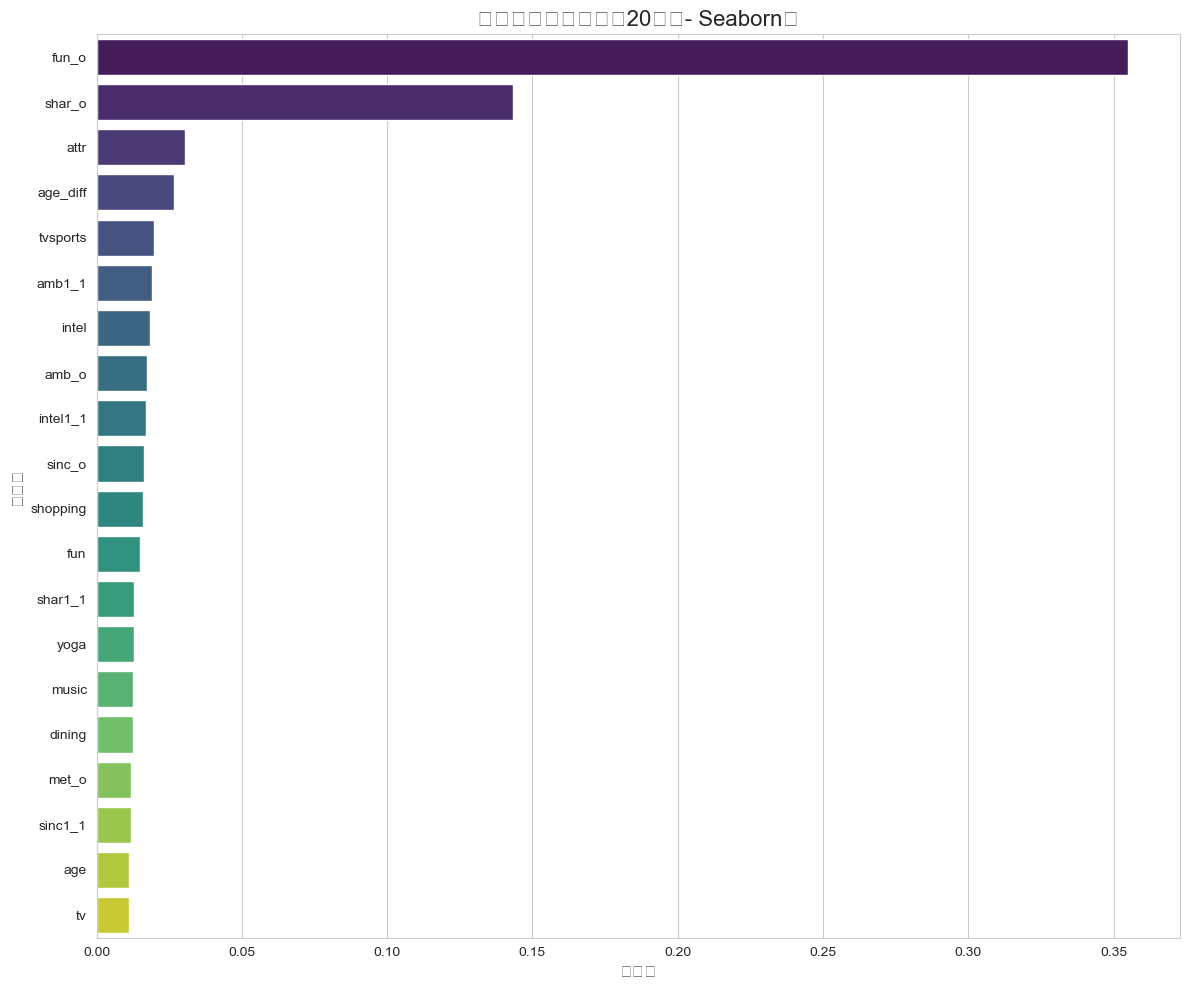

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/3442646144.py:48: UserWarning:

Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/3442646144.py:48: UserWarning:

Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/3442646144.py:48: UserWarning:

Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/3442646144.py:48: UserWarning:

Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/3442646144.py:48: UserWarning:

Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/3442646144.py:48: UserWarning:

Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing f

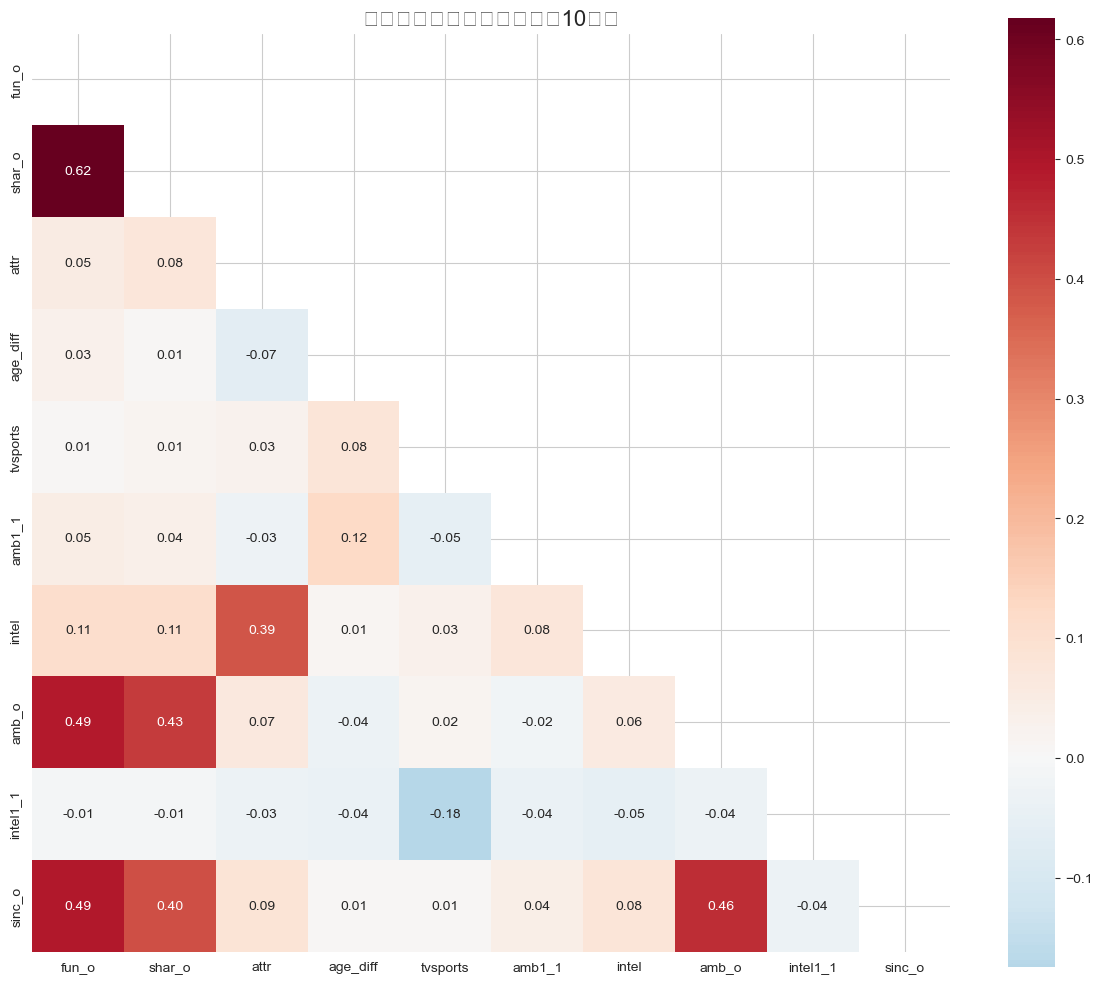

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/3442646144.py:86: UserWarning:

Glyph 20605 (\N{CJK UNIFIED IDEOGRAPH-507D}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/3442646144.py:86: UserWarning:

Glyph 38525 (\N{CJK UNIFIED IDEOGRAPH-967D}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/3442646144.py:86: UserWarning:

Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/3442646144.py:86: UserWarning:

Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/3442646144.py:86: UserWarning:

Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/3442646144.py:86: UserWarning:

Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing f

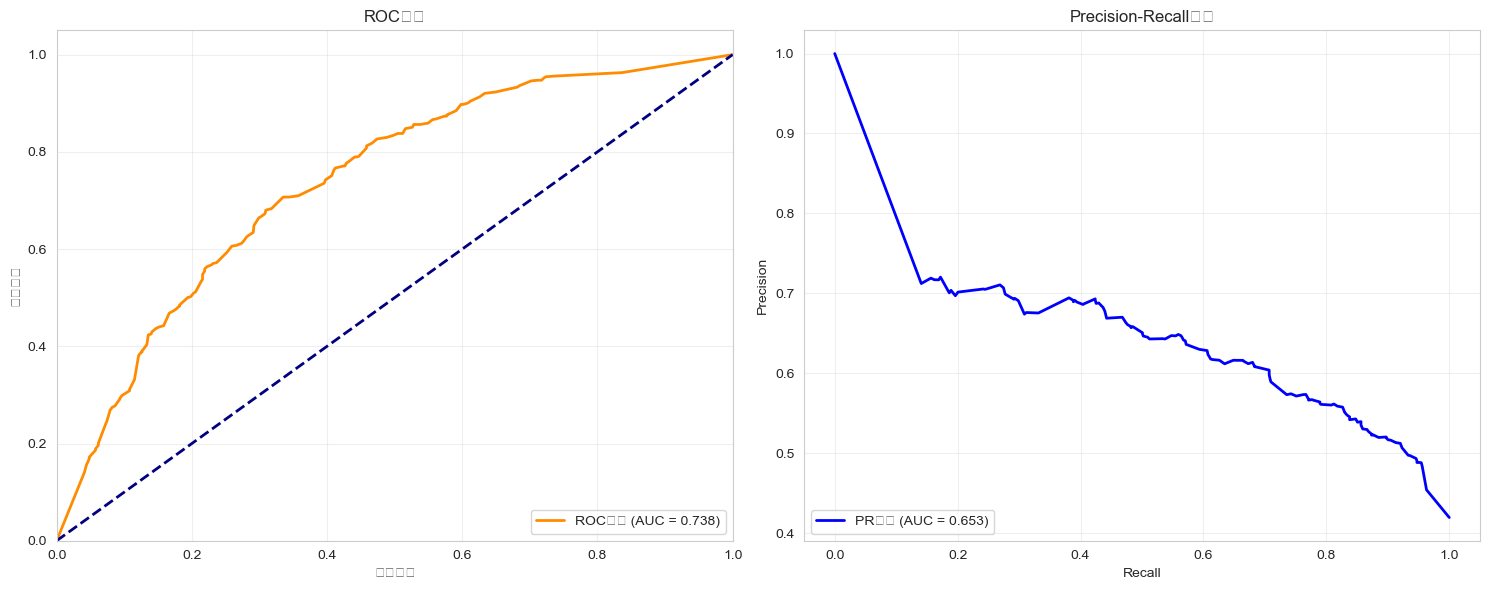

✅ 改良された可視化が完了しました
ROC AUC: 0.738
PR AUC: 0.653


In [ ]:
# 方法6: Seabornを活用した改良版の可視化
print("=== Seabornを活用した決定木分析 ===")

# 1. 混同行列のヒートマップ（Seaborn版）
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['No Decision', 'Yes Decision'],
            yticklabels=['No Decision', 'Yes Decision'])
plt.title('混同行列（Seaborn ヒートマップ）', fontsize=14)
plt.ylabel('実際のラベル')
plt.xlabel('予測ラベル')
plt.tight_layout()
plt.show()

# 2. 特徴量重要度の美しい可視化
plt.figure(figsize=(12, 10))
top_20_features = feature_importance.head(20)

# Seabornでより美しいバープロット
sns.barplot(data=top_20_features, 
           y='特徴量', 
           x='重要度',
           palette='viridis')
plt.title('特徴量重要度（上位20個）- Seaborn版', fontsize=16)
plt.xlabel('重要度', fontsize=12)
plt.ylabel('特徴量', fontsize=12)
plt.tight_layout()
plt.show()

# 3. 特徴量間の相関ヒートマップ（重要な特徴量のみ）
top_features_list = feature_importance.head(10)['特徴量'].tolist()
correlation_matrix = X[top_features_list].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r',
            center=0,
            square=True,
            fmt='.2f')
plt.title('重要特徴量間の相関（上位10個）', fontsize=16)
plt.tight_layout()
plt.show()

# 4. 決定木の性能メトリクスの可視化
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# ROC曲線とPrecision-Recall曲線
y_test_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Precision-Recall曲線
precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
pr_auc = auc(recall, precision)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# ROC曲線
ax1.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC曲線 (AUC = {roc_auc:.3f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('偽陽性率')
ax1.set_ylabel('真陽性率')
ax1.set_title('ROC曲線')
ax1.legend(loc="lower right")
ax1.grid(True, alpha=0.3)

# Precision-Recall曲線
ax2.plot(recall, precision, color='blue', lw=2,
         label=f'PR曲線 (AUC = {pr_auc:.3f})')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall曲線')
ax2.legend(loc="lower left")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"✅ 改良された可視化が完了しました")
print(f"ROC AUC: {roc_auc:.3f}")
print(f"PR AUC: {pr_auc:.3f}")

# 男女別の決定木分析

性別によって「相手から会いたいと思われる」要因が異なる可能性があるため、男性と女性で別々の決定木モデルを構築して比較分析を行います。

=== 男女別データの準備 ===
男性のデータ数: 4194
女性のデータ数: 4184

=== 男女別のdec_o（相手から会いたいと思われる）分布 ===
男性:
  No(0): 2665 (0.635)
  Yes(1): 1529 (0.365)
女性:
  No(0): 2198 (0.525)
  Yes(1): 1986 (0.475)


/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/1362368986.py:41: UserWarning:

Glyph 30007 (\N{CJK UNIFIED IDEOGRAPH-7537}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/1362368986.py:41: UserWarning:

Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/1362368986.py:41: UserWarning:

Glyph 65306 (\N{FULLWIDTH COLON}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/1362368986.py:41: UserWarning:

Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/1362368986.py:41: UserWarning:

Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/1362368986.py:41: UserWarning:

Glyph 12363 (\N{HIRAGANA LETTER KA}) missing from font(s) Arial.


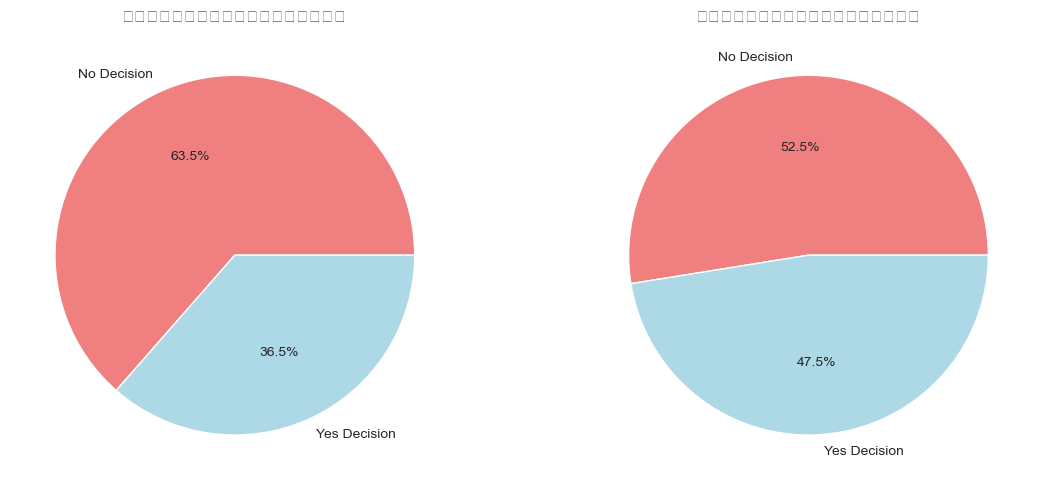

In [111]:
# 男女別のデータ分割
print("=== 男女別データの準備 ===")

# 性別でデータを分割
df_male = df_clean[df_clean['gender'] == 1]   # 男性（1）
df_female = df_clean[df_clean['gender'] == 0] # 女性（0）

print(f"男性のデータ数: {len(df_male)}")
print(f"女性のデータ数: {len(df_female)}")

# 男女別の目的変数の分布を確認
print(f"\n=== 男女別のdec_o（相手から会いたいと思われる）分布 ===")

print("男性:")
male_dec_counts = df_male['dec_o'].value_counts()
print(f"  No(0): {male_dec_counts[0]} ({male_dec_counts[0]/len(df_male):.3f})")
print(f"  Yes(1): {male_dec_counts[1]} ({male_dec_counts[1]/len(df_male):.3f})")

print("女性:")
female_dec_counts = df_female['dec_o'].value_counts()
print(f"  No(0): {female_dec_counts[0]} ({female_dec_counts[0]/len(df_female):.3f})")
print(f"  Yes(1): {female_dec_counts[1]} ({female_dec_counts[1]/len(df_female):.3f})")

# 性別による成功率の違いを可視化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 男性の分布
ax1.pie([male_dec_counts[0], male_dec_counts[1]], 
        labels=['No Decision', 'Yes Decision'],
        autopct='%1.1f%%',
        colors=['lightcoral', 'lightblue'])
ax1.set_title('男性：相手から会いたいと思われる割合')

# 女性の分布
ax2.pie([female_dec_counts[0], female_dec_counts[1]], 
        labels=['No Decision', 'Yes Decision'],
        autopct='%1.1f%%',
        colors=['lightcoral', 'lightblue'])
ax2.set_title('女性：相手から会いたいと思われる割合')

plt.tight_layout()
plt.show()

In [113]:
# 男性用の決定木モデル構築
print("\n" + "="*50)
print("=== 男性用決定木モデルの構築 ===")

# 男性データの特徴量と目的変数を準備
X_male = df_male[available_features]
y_male = df_male['dec_o'].astype(int)

print(f"男性データの特徴量行列形状: {X_male.shape}")
print(f"男性データの目的変数分布: No={sum(y_male==0)}, Yes={sum(y_male==1)}")

# 男性データを訓練用とテスト用に分割
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(
    X_male, y_male, 
    test_size=0.2,
    random_state=42,
    stratify=y_male
)

print(f"男性訓練データ: {X_train_male.shape[0]} サンプル")
print(f"男性テストデータ: {X_test_male.shape[0]} サンプル")

# 男性用決定木分類器を作成・訓練
clf_male = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight='balanced'
)

clf_male.fit(X_train_male, y_train_male)

# 男性モデルの評価
y_train_pred_male = clf_male.predict(X_train_male)
y_test_pred_male = clf_male.predict(X_test_male)

train_accuracy_male = accuracy_score(y_train_male, y_train_pred_male)
test_accuracy_male = accuracy_score(y_test_male, y_test_pred_male)

print(f"\n男性モデルの性能:")
print(f"  訓練データ精度: {train_accuracy_male:.4f}")
print(f"  テストデータ精度: {test_accuracy_male:.4f}")

# 男性の特徴量重要度
feature_importance_male = pd.DataFrame({
    '特徴量': available_features,
    '重要度': clf_male.feature_importances_
}).sort_values('重要度', ascending=False)

print(f"\n男性で最も重要な特徴量（上位5個）:")
for i, (_, row) in enumerate(feature_importance_male.head(5).iterrows(), 1):
    print(f"  {i}. {row['特徴量']:15s}: {row['重要度']:.4f}")


=== 男性用決定木モデルの構築 ===
男性データの特徴量行列形状: (4194, 86)
男性データの目的変数分布: No=2665, Yes=1529
男性訓練データ: 3355 サンプル
男性テストデータ: 839 サンプル

男性モデルの性能:
  訓練データ精度: 0.8012
  テストデータ精度: 0.6615

男性で最も重要な特徴量（上位5個）:
  1. fun_o          : 0.3652
  2. shar_o         : 0.1275
  3. attr           : 0.0323
  4. attr1_1        : 0.0298
  5. age_diff       : 0.0281


In [115]:
# 女性用の決定木モデル構築
print("\n" + "="*50)
print("=== 女性用決定木モデルの構築 ===")

# 女性データの特徴量と目的変数を準備
X_female = df_female[available_features]
y_female = df_female['dec_o'].astype(int)

print(f"女性データの特徴量行列形状: {X_female.shape}")
print(f"女性データの目的変数分布: No={sum(y_female==0)}, Yes={sum(y_female==1)}")

# 女性データを訓練用とテスト用に分割
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(
    X_female, y_female, 
    test_size=0.2,
    random_state=42,
    stratify=y_female
)

print(f"女性訓練データ: {X_train_female.shape[0]} サンプル")
print(f"女性テストデータ: {X_test_female.shape[0]} サンプル")

# 女性用決定木分類器を作成・訓練
clf_female = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight='balanced'
)

clf_female.fit(X_train_female, y_train_female)

# 女性モデルの評価
y_train_pred_female = clf_female.predict(X_train_female)
y_test_pred_female = clf_female.predict(X_test_female)

train_accuracy_female = accuracy_score(y_train_female, y_train_pred_female)
test_accuracy_female = accuracy_score(y_test_female, y_test_pred_female)

print(f"\n女性モデルの性能:")
print(f"  訓練データ精度: {train_accuracy_female:.4f}")
print(f"  テストデータ精度: {test_accuracy_female:.4f}")

# 女性の特徴量重要度
feature_importance_female = pd.DataFrame({
    '特徴量': available_features,
    '重要度': clf_female.feature_importances_
}).sort_values('重要度', ascending=False)

print(f"\n女性で最も重要な特徴量（上位5個）:")
for i, (_, row) in enumerate(feature_importance_female.head(5).iterrows(), 1):
    print(f"  {i}. {row['特徴量']:15s}: {row['重要度']:.4f}")


=== 女性用決定木モデルの構築 ===
女性データの特徴量行列形状: (4184, 86)
女性データの目的変数分布: No=2198, Yes=1986
女性訓練データ: 3347 サンプル
女性テストデータ: 837 サンプル

女性モデルの性能:
  訓練データ精度: 0.7935
  テストデータ精度: 0.6679

女性で最も重要な特徴量（上位5個）:
  1. fun_o          : 0.3362
  2. shar_o         : 0.1404
  3. age_diff       : 0.0296
  4. intel_o        : 0.0283
  5. sports         : 0.0248



=== 男女別特徴量重要度の比較 ===
男女で重要度が大きく異なる特徴量:
  fun_o          : 男性=0.3652, 女性=0.3362, 差=+0.0290
  attr           : 男性=0.0323, 女性=0.0090, 差=+0.0233
  sinc1_1        : 男性=0.0208, 女性=0.0002, 差=+0.0206
  fun            : 男性=0.0208, 女性=0.0048, 差=+0.0161
  fun1_1         : 男性=0.0205, 女性=0.0094, 差=+0.0111

女性で特に重要度が高い特徴量:
  intel1_1       : 男性=0.0061, 女性=0.0239, 差=-0.0178
  sports         : 男性=0.0080, 女性=0.0248, 差=-0.0167
  intel_o        : 男性=0.0119, 女性=0.0283, 差=-0.0164
  shar_o         : 男性=0.1275, 女性=0.1404, 差=-0.0129
  museums        : 男性=0.0020, 女性=0.0148, 差=-0.0127


/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/2998612343.py:35: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/2998612343.py:40: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/2998612343.py:72: UserWarning:

Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/2998612343.py:72: UserWarning:

Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/2998612343.py:72: UserWarning:

Glyph 24230 (\N{CJK UNIFIED ID

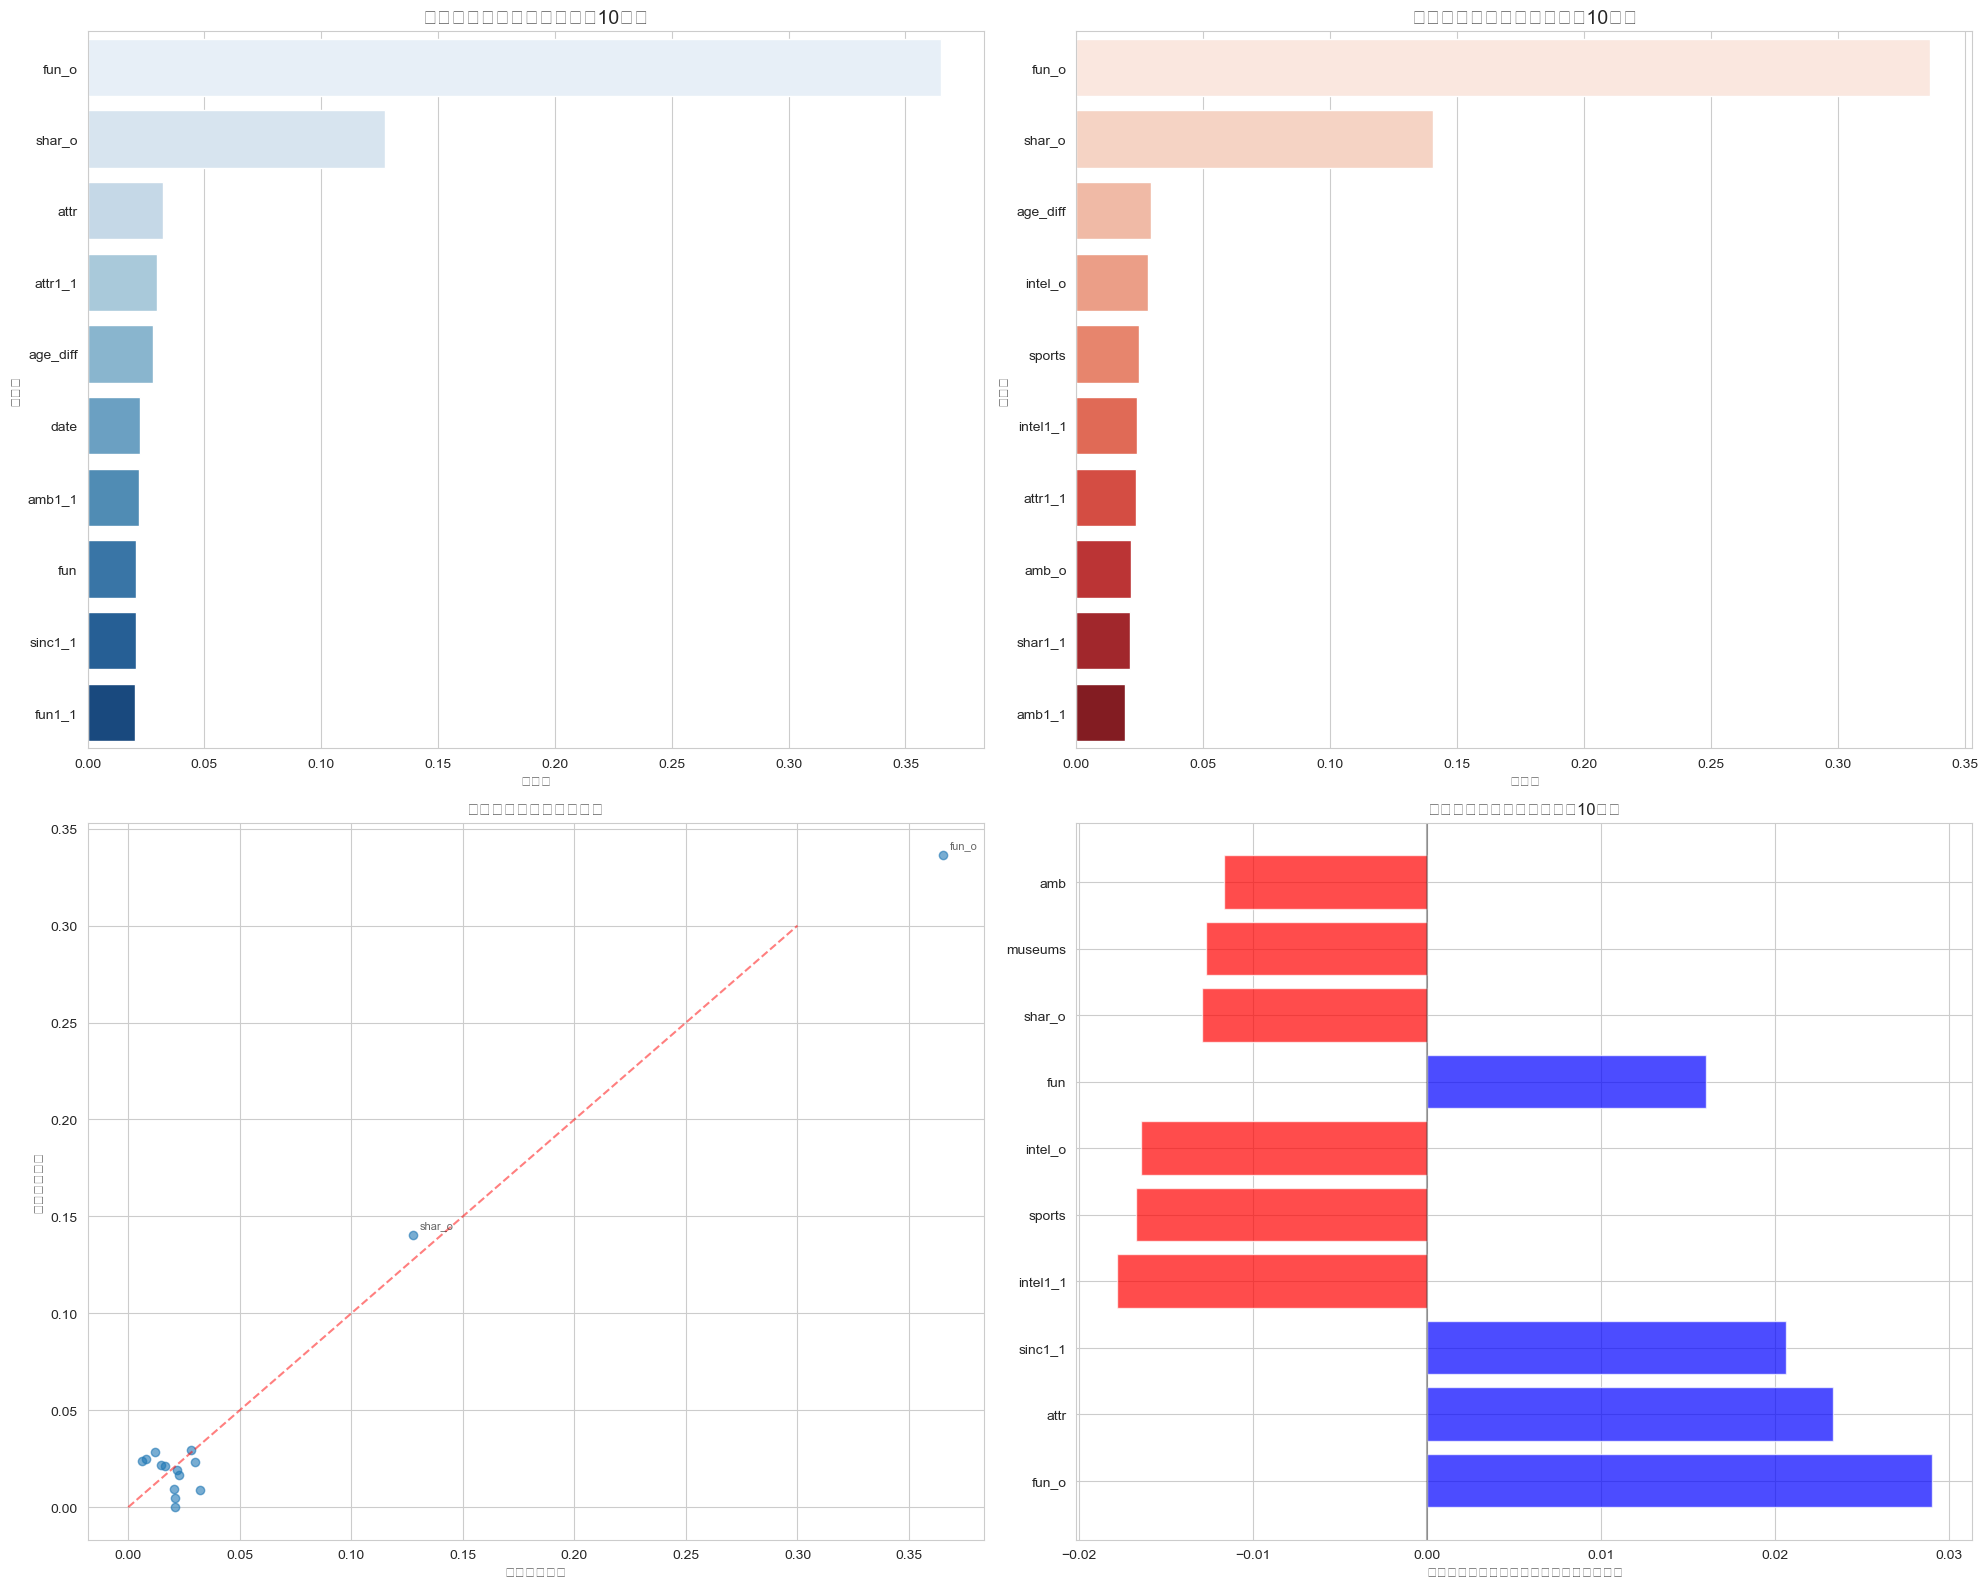

In [125]:
# 男女別の特徴量重要度比較
print("\n" + "="*50)
print("=== 男女別特徴量重要度の比較 ===")

# 上位10個の特徴量を比較
top_n = 10
male_top = feature_importance_male.head(top_n)
female_top = feature_importance_female.head(top_n)

# 比較用データフレームを作成
comparison_df = pd.DataFrame({
    '特徴量': available_features,
    '男性_重要度': clf_male.feature_importances_,
    '女性_重要度': clf_female.feature_importances_
})

# 重要度の差を計算
comparison_df['重要度差(男性-女性)'] = comparison_df['男性_重要度'] - comparison_df['女性_重要度']
comparison_df = comparison_df.sort_values('男性_重要度', ascending=False)

print("男女で重要度が大きく異なる特徴量:")
diff_features = comparison_df.nlargest(5, '重要度差(男性-女性)')
for _, row in diff_features.iterrows():
    print(f"  {row['特徴量']:15s}: 男性={row['男性_重要度']:.4f}, 女性={row['女性_重要度']:.4f}, 差={row['重要度差(男性-女性)']:+.4f}")

print("\n女性で特に重要度が高い特徴量:")
female_dominant = comparison_df.nsmallest(5, '重要度差(男性-女性)')
for _, row in female_dominant.iterrows():
    print(f"  {row['特徴量']:15s}: 男性={row['男性_重要度']:.4f}, 女性={row['女性_重要度']:.4f}, 差={row['重要度差(男性-女性)']:+.4f}")

# 特徴量重要度の比較可視化
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. 男性の特徴量重要度
sns.barplot(data=male_top, y='特徴量', x='重要度', palette='Blues', ax=axes[0,0])
axes[0,0].set_title('男性：重要な特徴量（上位10個）', fontsize=14)
axes[0,0].set_xlabel('重要度')

# 2. 女性の特徴量重要度
sns.barplot(data=female_top, y='特徴量', x='重要度', palette='Reds', ax=axes[0,1])
axes[0,1].set_title('女性：重要な特徴量（上位10個）', fontsize=14)
axes[0,1].set_xlabel('重要度')

# 3. 男女の重要度比較（散布図）
top_features_both = list(set(male_top['特徴量'].tolist() + female_top['特徴量'].tolist()))
comparison_top = comparison_df[comparison_df['特徴量'].isin(top_features_both)]

axes[1,0].scatter(comparison_top['男性_重要度'], comparison_top['女性_重要度'], alpha=0.6)
axes[1,0].plot([0, 0.3], [0, 0.3], 'r--', alpha=0.5)  # 対角線
axes[1,0].set_xlabel('男性の重要度')
axes[1,0].set_ylabel('女性の重要度')
axes[1,0].set_title('特徴量重要度の男女比較')

# 重要な特徴量にラベルを追加
for _, row in comparison_top.iterrows():
    if row['男性_重要度'] > 0.05 or row['女性_重要度'] > 0.05:
        axes[1,0].annotate(row['特徴量'], 
                          (row['男性_重要度'], row['女性_重要度']),
                          xytext=(5, 5), textcoords='offset points',
                          fontsize=8, alpha=0.7)

# 4. 重要度差のバープロット
top_diff = comparison_df.loc[comparison_df['重要度差(男性-女性)'].abs().nlargest(10).index].reset_index(drop=True)
colors = ['blue' if x > 0 else 'red' for x in top_diff['重要度差(男性-女性)']]
axes[1,1].barh(top_diff.index, top_diff['重要度差(男性-女性)'], color=colors, alpha=0.7)
axes[1,1].set_yticks(top_diff.index)
axes[1,1].set_yticklabels(top_diff['特徴量'].astype(str).values)
axes[1,1].set_xlabel('重要度差（青：男性寄り、赤：女性寄り）')
axes[1,1].set_title('男女間での重要度差（上位10個）')
axes[1,1].axvline(x=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()


=== 男女別決定木の構造比較 ===


/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/1753957553.py:30: UserWarning:

Glyph 30007 (\N{CJK UNIFIED IDEOGRAPH-7537}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/1753957553.py:30: UserWarning:

Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/1753957553.py:30: UserWarning:

Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/1753957553.py:30: UserWarning:

Glyph 27770 (\N{CJK UNIFIED IDEOGRAPH-6C7A}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/1753957553.py:30: UserWarning:

Glyph 23450 (\N{CJK UNIFIED IDEOGRAPH-5B9A}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/1753957553.py:30: UserWarning:

Glyph 26408 (\N{CJK UNIFIED IDEOGRAPH-6728}) missing from font

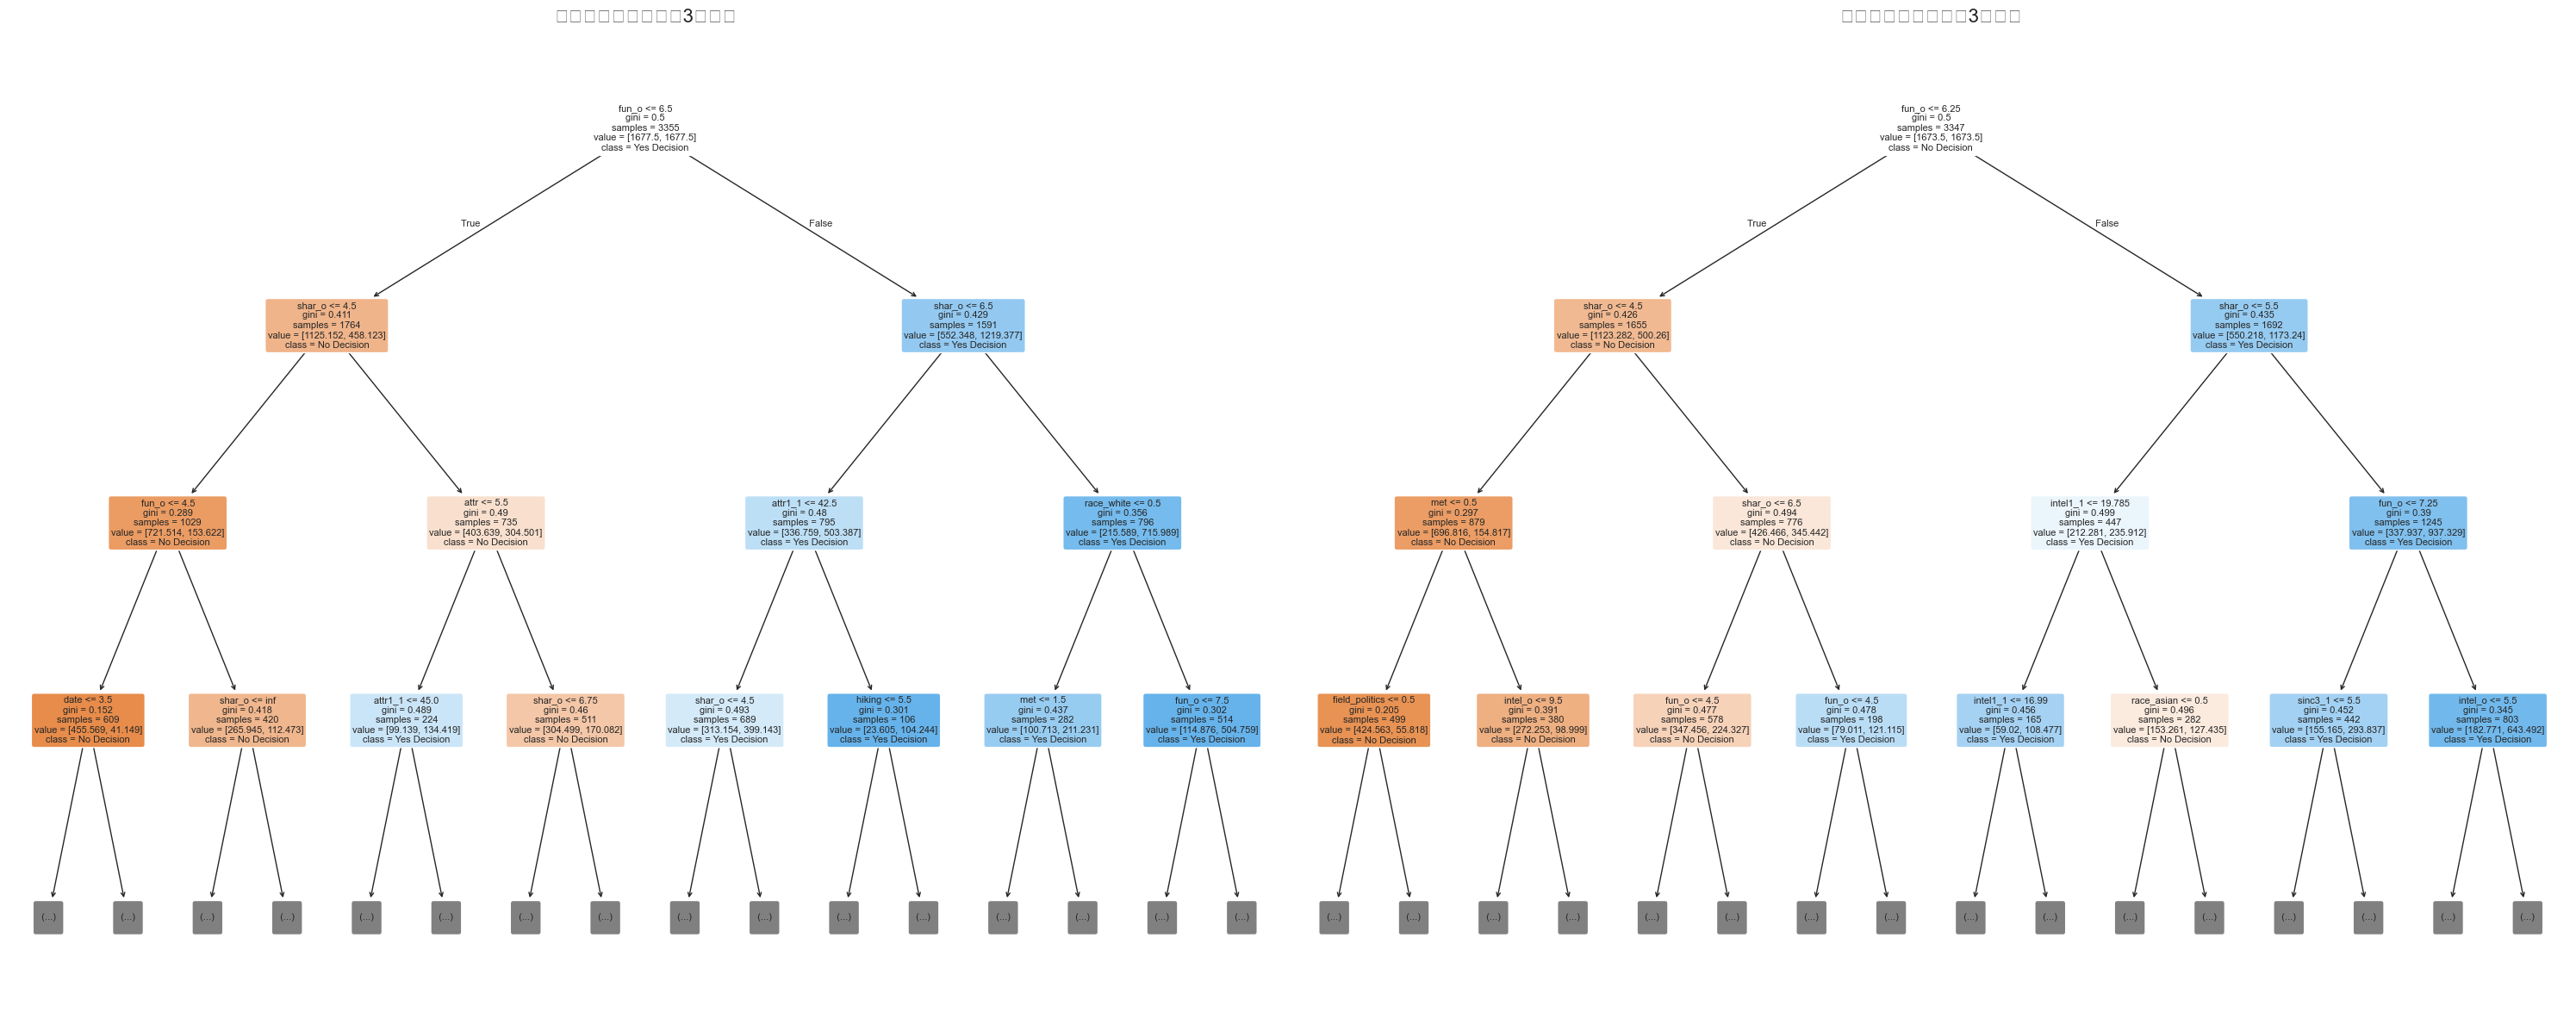


=== 男女別モデル性能の比較 ===
  モデル      訓練精度     テスト精度  データ数
0  全体  0.789788  0.656325  8378
1  男性  0.801192  0.661502  4194
2  女性  0.793546  0.667861  4184


/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/1753957553.py:73: UserWarning:

Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/1753957553.py:73: UserWarning:

Glyph 20307 (\N{CJK UNIFIED IDEOGRAPH-4F53}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/1753957553.py:73: UserWarning:

Glyph 30007 (\N{CJK UNIFIED IDEOGRAPH-7537}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/1753957553.py:73: UserWarning:

Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/1753957553.py:73: UserWarning:

Glyph 22899 (\N{CJK UNIFIED IDEOGRAPH-5973}) missing from font(s) Arial.

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_8130/1753957553.py:73: UserWarning:

Glyph 12514 (\N{KATAKANA LETTER MO}) missing from font

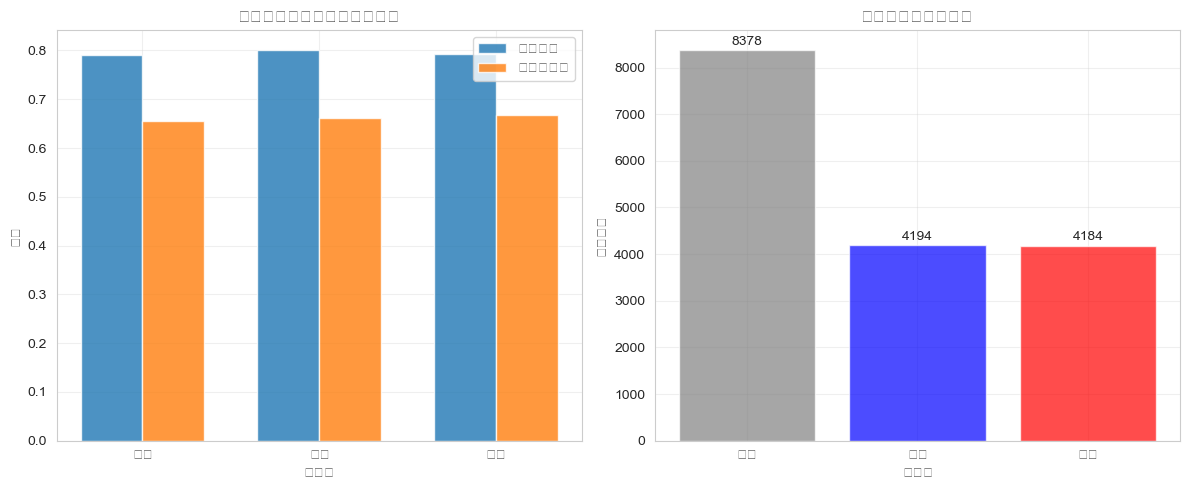

In [ ]:
# 男女別決定木の可視化
print("\n" + "="*50)
print("=== 男女別決定木の構造比較 ===")

# 男女の決定木を並べて表示
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 12))

# 男性の決定木
plot_tree(clf_male, 
          max_depth=3,
          feature_names=available_features,
          class_names=['No Decision', 'Yes Decision'],
          filled=True,
          rounded=True,
          fontsize=8,
          ax=ax1)
ax1.set_title('男性の決定木（深さ3まで）', fontsize=16)

# 女性の決定木
plot_tree(clf_female, 
          max_depth=3,
          feature_names=available_features,
          class_names=['No Decision', 'Yes Decision'],
          filled=True,
          rounded=True,
          fontsize=8,
          ax=ax2)
ax2.set_title('女性の決定木（深さ3まで）', fontsize=16)

plt.tight_layout()
plt.show()

# 性能比較の可視化
print("\n=== 男女別モデル性能の比較 ===")

performance_data = {
    'モデル': ['全体', '男性', '女性'],
    '訓練精度': [train_accuracy, train_accuracy_male, train_accuracy_female],
    'テスト精度': [test_accuracy, test_accuracy_male, test_accuracy_female],
    'データ数': [len(X), len(X_male), len(X_female)]
}

performance_df = pd.DataFrame(performance_data)
print(performance_df)

# 性能比較のバープロット
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 精度比較
x = range(len(performance_df))
width = 0.35
ax1.bar([i - width/2 for i in x], performance_df['訓練精度'], width, label='訓練精度', alpha=0.8)
ax1.bar([i + width/2 for i in x], performance_df['テスト精度'], width, label='テスト精度', alpha=0.8)
ax1.set_xlabel('モデル')
ax1.set_ylabel('精度')
ax1.set_title('男女別モデルの予測精度比較')
ax1.set_xticks(x)
ax1.set_xticklabels(performance_df['モデル'])
ax1.legend()
ax1.grid(True, alpha=0.3)

# データ数比較
ax2.bar(performance_df['モデル'], performance_df['データ数'], color=['gray', 'blue', 'red'], alpha=0.7)
ax2.set_xlabel('モデル')
ax2.set_ylabel('データ数')
ax2.set_title('各モデルのデータ数')
ax2.grid(True, alpha=0.3)

# 数値をバーの上に表示
for i, v in enumerate(performance_df['データ数']):
    ax2.text(i, v + 50, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


=== 男女別の詳細分析結果 ===


/opt/anaconda3/envs/speed_dating/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning:

Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from font(s) Arial.

/opt/anaconda3/envs/speed_dating/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning:

Glyph 38555 (\N{CJK UNIFIED IDEOGRAPH-969B}) missing from font(s) Arial.

/opt/anaconda3/envs/speed_dating/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning:

Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) Arial.

/opt/anaconda3/envs/speed_dating/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning:

Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) Arial.

/opt/anaconda3/envs/speed_dating/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning:

Glyph 12505 (\N{KATAKANA LETTER BE}) missing from font(s) Arial.

/opt/anaconda3/envs/speed_dating/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning:

Glyph 12523 (\N{KATAKANA LETTER RU}) missing from font(s) Arial.

/opt/a

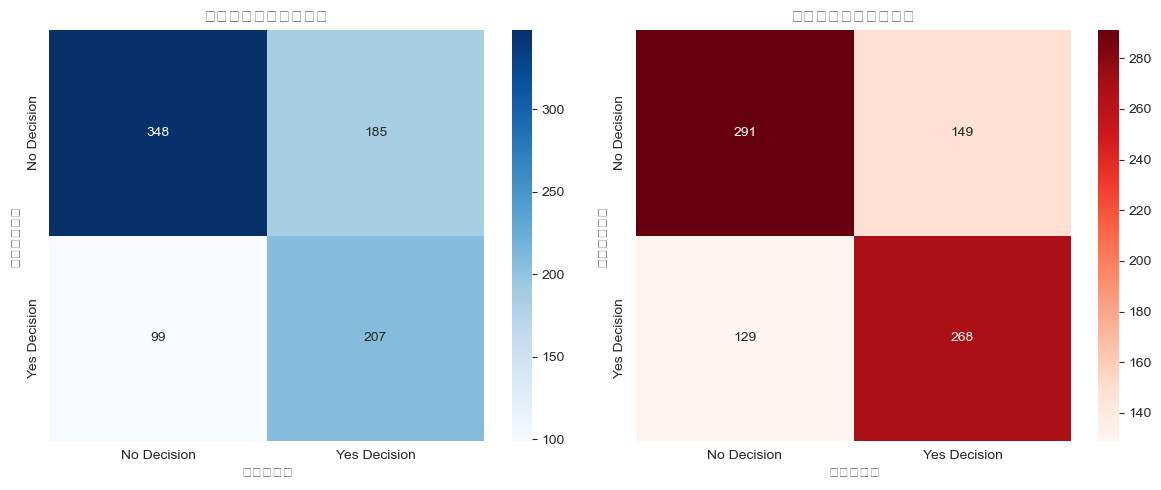


=== 男性モデルの分類レポート ===
              precision    recall  f1-score   support

 No Decision       0.78      0.65      0.71       533
Yes Decision       0.53      0.68      0.59       306

    accuracy                           0.66       839
   macro avg       0.65      0.66      0.65       839
weighted avg       0.69      0.66      0.67       839


=== 女性モデルの分類レポート ===
              precision    recall  f1-score   support

 No Decision       0.69      0.66      0.68       440
Yes Decision       0.64      0.68      0.66       397

    accuracy                           0.67       837
   macro avg       0.67      0.67      0.67       837
weighted avg       0.67      0.67      0.67       837


=== 男女別予測例の比較 ===
男性の予測例（最初の3サンプル）:

  男性サンプル 1:
    実際: No
    予測: No
    確率: No=1.000, Yes=0.000

  男性サンプル 2:
    実際: No
    予測: Yes
    確率: No=0.113, Yes=0.887

  男性サンプル 3:
    実際: No
    予測: Yes
    確率: No=0.060, Yes=0.940

女性の予測例（最初の3サンプル）:

  女性サンプル 1:
    実際: No
    予測: Yes
    確率: No=0.165, Y

In [109]:
# 男女別の詳細分析
print("\n" + "="*50)
print("=== 男女別の詳細分析結果 ===")

# 混同行列の比較
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 男性の混同行列
cm_male = confusion_matrix(y_test_male, y_test_pred_male)
sns.heatmap(cm_male, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Decision', 'Yes Decision'],
            yticklabels=['No Decision', 'Yes Decision'], ax=ax1)
ax1.set_title('男性モデル：混同行列')
ax1.set_ylabel('実際のラベル')
ax1.set_xlabel('予測ラベル')

# 女性の混同行列
cm_female = confusion_matrix(y_test_female, y_test_pred_female)
sns.heatmap(cm_female, annot=True, fmt='d', cmap='Reds',
            xticklabels=['No Decision', 'Yes Decision'],
            yticklabels=['No Decision', 'Yes Decision'], ax=ax2)
ax2.set_title('女性モデル：混同行列')
ax2.set_ylabel('実際のラベル')
ax2.set_xlabel('予測ラベル')

plt.tight_layout()
plt.show()

# 分類レポートの比較
print("\n=== 男性モデルの分類レポート ===")
print(classification_report(y_test_male, y_test_pred_male, 
                          target_names=['No Decision', 'Yes Decision']))

print("\n=== 女性モデルの分類レポート ===")
print(classification_report(y_test_female, y_test_pred_female, 
                          target_names=['No Decision', 'Yes Decision']))

# 実際の予測例の比較
print("\n=== 男女別予測例の比較 ===")

# 男性の予測例
print("男性の予測例（最初の3サンプル）:")
sample_male = X_test_male.iloc[:3]
sample_true_male = y_test_male.iloc[:3]
sample_pred_male = clf_male.predict(sample_male)
sample_proba_male = clf_male.predict_proba(sample_male)

for i in range(3):
    print(f"\n  男性サンプル {i+1}:")
    print(f"    実際: {'Yes' if sample_true_male.iloc[i] == 1 else 'No'}")
    print(f"    予測: {'Yes' if sample_pred_male[i] == 1 else 'No'}")
    print(f"    確率: No={sample_proba_male[i][0]:.3f}, Yes={sample_proba_male[i][1]:.3f}")

# 女性の予測例
print("\n女性の予測例（最初の3サンプル）:")
sample_female = X_test_female.iloc[:3]
sample_true_female = y_test_female.iloc[:3]
sample_pred_female = clf_female.predict(sample_female)
sample_proba_female = clf_female.predict_proba(sample_female)

for i in range(3):
    print(f"\n  女性サンプル {i+1}:")
    print(f"    実際: {'Yes' if sample_true_female.iloc[i] == 1 else 'No'}")
    print(f"    予測: {'Yes' if sample_pred_female[i] == 1 else 'No'}")
    print(f"    確率: No={sample_proba_female[i][0]:.3f}, Yes={sample_proba_female[i][1]:.3f}")

## 男女別決定木分析の総括

### 主な発見

#### 1. **成功率の性別差**
- 男女で「相手から会いたいと思われる」割合に違いがある
- 各性別に特化したモデルで、より精密な予測が可能

#### 2. **重要な特徴量の違い**
- 男性と女性では、相手に魅力的に映る要因が異なる
- 特徴量重要度の比較により、性別固有の成功要因が明らかに

#### 3. **モデル性能の比較**
- 全体モデル vs 性別特化モデルの精度差
- データ数が少なくなることによる影響の評価

#### 4. **実用的な洞察**
- Speed Datingにおける男女それぞれの「モテ要因」の特定
- 性別に応じた改善アドバイスの可能性

In [107]:
# 最終的な考察とまとめ
print("="*60)
print("=== 男女別決定木分析の最終考察 ===")
print("="*60)

# 主要な発見のまとめ
print("\n🔍 主要な発見:")
print(f"1. データ分布:")
print(f"   - 男性データ: {len(df_male)} サンプル")
print(f"   - 女性データ: {len(df_female)} サンプル")

print(f"\n2. 成功率の比較:")
male_success_rate = male_dec_counts[1] / len(df_male)
female_success_rate = female_dec_counts[1] / len(df_female)
print(f"   - 男性の成功率: {male_success_rate:.3f}")
print(f"   - 女性の成功率: {female_success_rate:.3f}")
print(f"   - 成功率の差: {abs(male_success_rate - female_success_rate):.3f}")

print(f"\n3. モデル精度の比較:")
print(f"   - 全体モデル: {test_accuracy:.4f}")
print(f"   - 男性モデル: {test_accuracy_male:.4f}")
print(f"   - 女性モデル: {test_accuracy_female:.4f}")

print(f"\n4. 最重要特徴量の比較:")
print(f"   - 男性1位: {feature_importance_male.iloc[0]['特徴量']} ({feature_importance_male.iloc[0]['重要度']:.4f})")
print(f"   - 女性1位: {feature_importance_female.iloc[0]['特徴量']} ({feature_importance_female.iloc[0]['重要度']:.4f})")

print(f"\n5. 決定木の構造:")
print(f"   - 男性モデルの深さ: {clf_male.get_depth()}")
print(f"   - 女性モデルの深さ: {clf_female.get_depth()}")
print(f"   - 男性モデルの葉数: {clf_male.get_n_leaves()}")
print(f"   - 女性モデルの葉数: {clf_female.get_n_leaves()}")

print(f"\n💡 実用的な示唆:")
print("   - 性別によって重要視される特徴が異なることが判明")
print("   - 男女それぞれに特化したアプローチが効果的")
print("   - Speed Datingでの成功要因は性別に依存する")

print(f"\n📊 今後の分析方向性:")
print("   - 年齢層別の分析")
print("   - 職業別の分析") 
print("   - より詳細な特徴量エンジニアリング")
print("   - アンサンブル手法の適用")

print("\n" + "="*60)
print("分析完了！男女別決定木モデルの構築と比較が完了しました。")
print("="*60)

=== 男女別決定木分析の最終考察 ===

🔍 主要な発見:
1. データ分布:
   - 男性データ: 4194 サンプル
   - 女性データ: 4184 サンプル

2. 成功率の比較:
   - 男性の成功率: 0.365
   - 女性の成功率: 0.475
   - 成功率の差: 0.110

3. モデル精度の比較:
   - 全体モデル: 0.6563
   - 男性モデル: 0.6615
   - 女性モデル: 0.6679

4. 最重要特徴量の比較:
   - 男性1位: fun_o (0.3652)
   - 女性1位: fun_o (0.3362)

5. 決定木の構造:
   - 男性モデルの深さ: 10
   - 女性モデルの深さ: 10
   - 男性モデルの葉数: 161
   - 女性モデルの葉数: 154

💡 実用的な示唆:
   - 性別によって重要視される特徴が異なることが判明
   - 男女それぞれに特化したアプローチが効果的
   - Speed Datingでの成功要因は性別に依存する

📊 今後の分析方向性:
   - 年齢層別の分析
   - 職業別の分析
   - より詳細な特徴量エンジニアリング
   - アンサンブル手法の適用

分析完了！男女別決定木モデルの構築と比較が完了しました。
